# Avance 1

### Llamar a las bibliotecas que vamos a utilizar.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Leer el archivo .

In [6]:
df = pd.read_csv("data_latinoamerica.csv", sep=",")

### Mostrar las primeras lineas.

In [7]:
print(df.head())

  location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                

### Comprueba la cantidad de datos usando shape.

In [8]:
np.shape(df)

(12216057, 50)

In [9]:
df.shape

(12216057, 50)

Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.

In [10]:
paises = ["Argentina", "Brazil", "Mexico","Chile", "Colombia", "Peru"]
df_filtrado = df[df["country_name"].isin(paises)]

Mostrar cantidad de datos filtrados.

In [11]:
df_filtrado.shape

(11970289, 50)

Verificar la cantidad de datos nulos que posee el dataframe. 

In [12]:
df_filtrado.isnull().sum()[df_filtrado.isnull().sum() > 4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [13]:
df_filtrado.location_key.value_counts()

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

### Filtrar usando la columna "location_key", para filtrados datos nulos, que aparecen en esta columna y solo usaremos los codigos correspondientes de cada pais AR,BR,CL,CO,PE,BR.

In [14]:
df_filtrado_paises = df_filtrado[df_filtrado["location_key"].isin(["AR","BR","CO","CL","MX","PE"])]


### Verificar filtrado.

In [15]:
df_filtrado_paises.shape

(5946, 50)

### Filtra los datos en fechas mayores a 2021-01-01.

In [16]:
df_filtrado_paises_fecha = df_filtrado_paises [df_filtrado_paises ["date"] > "2021-01-01"]

In [17]:
df_filtrado_paises_fecha.shape

(3744, 50)

En base a los filtrados por paises, fechas podemos ver ahora los valores nulos y negativos para limpiar el data set.

In [18]:
# valores nulos
nulos_fecha = df_filtrado_paises_fecha.isnull().sum()[df_filtrado_paises_fecha.isnull().sum()>0]
print (nulos_fecha)
print (np.shape(df_filtrado_paises_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


### Llenar valores nulos.

In [19]:
nulos_fecha.shape

(12,)

Usamos un for para completar los valores nulos.

In [20]:
for pais in paises :
    for columna in df_filtrado_paises_fecha:
        if columna != 'country_name': 
            moda = df_filtrado_paises_fecha[df_filtrado_paises_fecha['country_name'] == pais][columna].mode().iloc[0] if not df_filtrado_paises_fecha[df_filtrado_paises_fecha['country_name'] == pais][columna].mode().empty else np.nan
            df_filtrado_paises_fecha.loc[df_filtrado_paises_fecha['country_name'] == pais, columna] = df_filtrado_paises_fecha.loc[df_filtrado_paises_fecha['country_name'] == pais, columna].fillna(moda)

print(df_filtrado_paises_fecha)

         location_key        date country_code country_name  new_confirmed  \
367                AR  2021-01-02           AR    Argentina         7767.0   
368                AR  2021-01-03           AR    Argentina         4934.0   
369                AR  2021-01-04           AR    Argentina        13953.0   
370                AR  2021-01-05           AR    Argentina        14085.0   
371                AR  2021-01-06           AR    Argentina        14496.0   
...               ...         ...          ...          ...            ...   
10253872           PE  2022-09-13           PE         Peru         1150.0   
10253873           PE  2022-09-14           PE         Peru            0.0   
10253874           PE  2022-09-15           PE         Peru            0.0   
10253875           PE  2022-09-16           PE         Peru            0.0   
10253876           PE  2022-09-17           PE         Peru            0.0   

          new_deceased  cumulative_confirmed  cumulative_deceas

Verificamos el funcionamiento del codigo imprimiendo nuevamente los valores nulos.

In [21]:
nulos_fecha = df_filtrado_paises_fecha.isnull().sum()[df_filtrado_paises_fecha.isnull().sum()>0]
print (nulos_fecha)
print (np.shape(df_filtrado_paises_fecha))

new_recovered           1872
cumulative_recovered    2496
dtype: int64
(3744, 50)


### Se solicita una descripcion de los datos utilizando un bucle .

In [22]:
for i in df_filtrado_paises_fecha.columns:
    print(i)
    print(df_filtrado_paises_fecha[i].describe())
    print('________________________________________')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
________________________________________
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
________________________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
________________________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
________________________________________
new_confirmed
count      3744.000000
mean      13863.400374
std       24225.379296
min        -573.000000
25%        1512.500000
50%        5119.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
________________________________________
new_deceased
count     3744.000000
mean       275.702991
std        507.398146
min          0.000000
25% 

### Se solicita una descripcion utilizando el bucle while.

In [23]:
i = 0 
while i < len(df_filtrado_paises_fecha.columns):
    print(df_filtrado_paises_fecha.columns[i])
    print(df_filtrado_paises_fecha[df_filtrado_paises_fecha.columns[i]].describe())
    print('__________________________________________________')
    i += 1

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
__________________________________________________
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
__________________________________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
__________________________________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
__________________________________________________
new_confirmed
count      3744.000000
mean      13863.400374
std       24225.379296
min        -573.000000
25%        1512.500000
50%        5119.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
__________________________________________________
new_deceased
count     3744.000000
mean       275.70299

### Como ver los valores negativos.

In [24]:
# Función para identificar columnas con valores negativos
def columnas_con_negativos():
    columnas_negativas = []
    # Filtrar solo las columnas numéricas
    df_numerico = df_filtrado_paises_fecha.select_dtypes(include=[int, float])
    for col in df_numerico.columns:
        if (df_numerico[col] < 0).any():
            columnas_negativas.append(col)
    return columnas_negativas

# Uso de la función
columnas_negativas = columnas_con_negativos()
print("Columnas con valores negativos:", columnas_negativas)

Columnas con valores negativos: ['new_confirmed', 'latitude', 'longitude', 'minimum_temperature_celsius', 'new_recovered']


Me otorga las columnas donde se encuentran valores negativos, en la columna de nuevos recuperados y nuevos confirmados no pueden haber valores negativos, lo cual deberemos eliminar esos valores.

Procedemos a eliminar los valores negativos para evitar un posible sesgo en los los valores, ya que esto puede afectar al resultado, en caso que quisieramos reemplazar esos valores

In [25]:
## creo una variable donde se encuentran las columnas con los valores negativos que deseo modificar
columnas_sin_negativos = ['new_confirmed', 'new_recovered']

## creo una funcion con los valores negativos a reemplazar por 0 

def reemplazar_negativos(df,columnas):
    for col in columnas:
        df.loc[df[col] < 0, col] = 0
    return df

## llamo a la funcion
df_filtrado_paises_fecha_sinNegativos = reemplazar_negativos(df_filtrado_paises_fecha.copy(),columnas_sin_negativos)
print(df_filtrado_paises_fecha_sinNegativos)

         location_key        date country_code country_name  new_confirmed  \
367                AR  2021-01-02           AR    Argentina         7767.0   
368                AR  2021-01-03           AR    Argentina         4934.0   
369                AR  2021-01-04           AR    Argentina        13953.0   
370                AR  2021-01-05           AR    Argentina        14085.0   
371                AR  2021-01-06           AR    Argentina        14496.0   
...               ...         ...          ...          ...            ...   
10253872           PE  2022-09-13           PE         Peru         1150.0   
10253873           PE  2022-09-14           PE         Peru            0.0   
10253874           PE  2022-09-15           PE         Peru            0.0   
10253875           PE  2022-09-16           PE         Peru            0.0   
10253876           PE  2022-09-17           PE         Peru            0.0   

          new_deceased  cumulative_confirmed  cumulative_deceas

### Cambiamos el tipo de dato de la fecha, "date".

In [26]:
df_filtrado_paises_fecha_sinNegativos['date'] = pd.to_datetime(df_filtrado_paises_fecha_sinNegativos['date'], format="%Y-%m-%d")


Verificamos el cambio de formato.

In [27]:
print(df_filtrado_paises_fecha_sinNegativos['date'].dtype)

datetime64[ns]


indexo las fechas 

In [28]:
'''df_filtrado_paises_fecha_sinNegativos.set_index('date',inplace=True)

SyntaxError: incomplete input (1213980576.py, line 1)

In [ ]:
''''print(df_filtrado_paises_fecha_sinNegativos.index)

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11',
               ...
               '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11',
               '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
               '2022-09-16', '2022-09-17'],
              dtype='datetime64[ns]', name='date', length=3744, freq=None)


### Aplicar bucles for/while para obtener calculos estadisticos y metricas importantes

In [29]:
def calculosEstadisticos(df):
    for i in df:
        if df[i].dtype == "float64" or df[i].dtype == "int64":
            print("Columna: ", i)
            print("Mediana: ", df[i].median())
            print("Moda: ", df[i].mode())
            print("Media: ", df[i].mean())
            print("Desviación estándar: ", df[i].std())
            print("Varianza: ", df[i].var())
            print("Rango: ", df[i].max() - df[i].min())
            print("Maximo: ",df[i].max())
            print("Minimo: ",df[i].min())
            print("-------------------------------------------------")

calculosEstadisticos(df_filtrado_paises_fecha_sinNegativos)

Columna:  new_confirmed
Mediana:  5119.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
Media:  13863.553418803418
Desviación estándar:  24225.28987930572
Varianza:  586864669.7363923
Rango:  298408.0
Maximo:  298408.0
Minimo:  0.0
-------------------------------------------------
Columna:  new_deceased
Mediana:  98.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
Media:  275.70299145299145
Desviación estándar:  507.39814580532646
Varianza:  257452.87836668335
Rango:  11447.0
Maximo:  11447.0
Minimo:  0.0
-------------------------------------------------
Columna:  cumulative_confirmed
Mediana:  3632143.5
Moda:  0    6093645.0
1    9313453.0
Name: cumulative_confirmed, dtype: float64
Media:  6771383.144497863
Desviación estándar:  7983182.395038494
Varianza:  63731201152452.54
Rango:  34567862.0
Maximo:  34568833.0
Minimo:  971.0
-------------------------------------------------
Columna:  cumulative_deceased
Mediana:  139628.5
Moda:  0    128994.0
1    139809.0
Name: cumulative

¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?
**En estas metricas podemos medir los valores estadisticos mas importantes de cada columna, obteniendo datos importantes para poder realizar un analisis mas detallado, no otorgan datos especificos y necesarios para poder medir distintos aspectos que nos serviran para llegar a una conclusion**

¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
**

¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?

### Verificamos la cantidad de nulos.

In [30]:
ValoresNulos = df_filtrado_paises_fecha_sinNegativos.isnull().sum()[df_filtrado_paises_fecha_sinNegativos.isnull().sum()>0]
print (ValoresNulos)
print (np.shape(df_filtrado_paises_fecha_sinNegativos))

new_recovered           1872
cumulative_recovered    2496
dtype: int64
(3744, 50)


Llenamos lo valores nulos ubicados en las columnas new recovered y cumulative_recovered.

In [31]:
df_filtrado_paises_fecha_sinNegativos['new_recovered'] = df_filtrado_paises_fecha_sinNegativos['new_recovered'].fillna(0)
df_filtrado_paises_fecha_sinNegativos['cumulative_recovered'] = df_filtrado_paises_fecha_sinNegativos['cumulative_recovered'].fillna(0)

Verificamos valores los nulos.

In [32]:
ValoresNulosActualizado = df_filtrado_paises_fecha_sinNegativos.isnull().sum()
print("Valores nulos actualizados:")
print(ValoresNulosActualizado)

Valores nulos actualizados:
location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69      

### Guardamos el dataset limpio para poder trabajar.

In [33]:
df_filtrado_paises_fecha_sinNegativos.to_csv('DatosFinalesFiltrados.csv')

# Avance 2

### Llamamos a las bibliotecas a utilizar.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leemos el archivo guardado que vamos a utilizar.

In [6]:
dfNuevo_filtrado = pd.read_csv("DatosFinalesFiltrados.csv", sep=",")

### Consultamos la informacion en cada columna.

In [7]:
for i in dfNuevo_filtrado:
    print(i)
    print(dfNuevo_filtrado[i].describe())
    print('_______________________________')

Unnamed: 0
count    3.744000e+03
mean     5.190546e+06
std      3.722908e+06
min      3.670000e+02
25%      5.506838e+05
50%      6.296006e+06
75%      7.746334e+06
max      1.025388e+07
Name: Unnamed: 0, dtype: float64
_______________________________
location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
_______________________________
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
_______________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
_______________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
_______________________________
new_confirmed
count      3744.000000
mean      13863.553419
std       24225.289879
min           0.000000
25%        1512.500000
50%        5119.000000
75%       14

La columna "date", le cambio el formato y la declaro como indice.

In [8]:
dfNuevo_filtrado ['date'] = pd.to_datetime (dfNuevo_filtrado['date'])
dfNuevo_filtrado.set_index('date', inplace=True)

Verifico que la columna 'date' ha sido correctamente convertida y establecida como indice.

In [9]:
print(dfNuevo_filtrado.head())
print(dfNuevo_filtrado.index)

            Unnamed: 0 location_key country_code country_name  new_confirmed  \
date                                                                           
2021-01-02         367           AR           AR    Argentina         7767.0   
2021-01-03         368           AR           AR    Argentina         4934.0   
2021-01-04         369           AR           AR    Argentina        13953.0   
2021-01-05         370           AR           AR    Argentina        14085.0   
2021-01-06         371           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06   

### Se elimina la tabla Unnamed.

In [10]:
# Drop column unnamed 0
dfNuevo_filtrado.drop(columns='Unnamed: 0', inplace=True)

### Crear una matriz de correlacion de las variables numericas.

In [11]:
columnas_numericas = dfNuevo_filtrado.select_dtypes(include=["float64", "int64"]).columns
matriz_correlacion = dfNuevo_filtrado[columnas_numericas].corr()

#Se crea la mascara para el triangulo superior
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# filtramos valores mayores a 0.5 para mostrar las correlaciones mas fuertes
matriz_correlacion = matriz_correlacion[abs(matriz_correlacion) > 0.5]

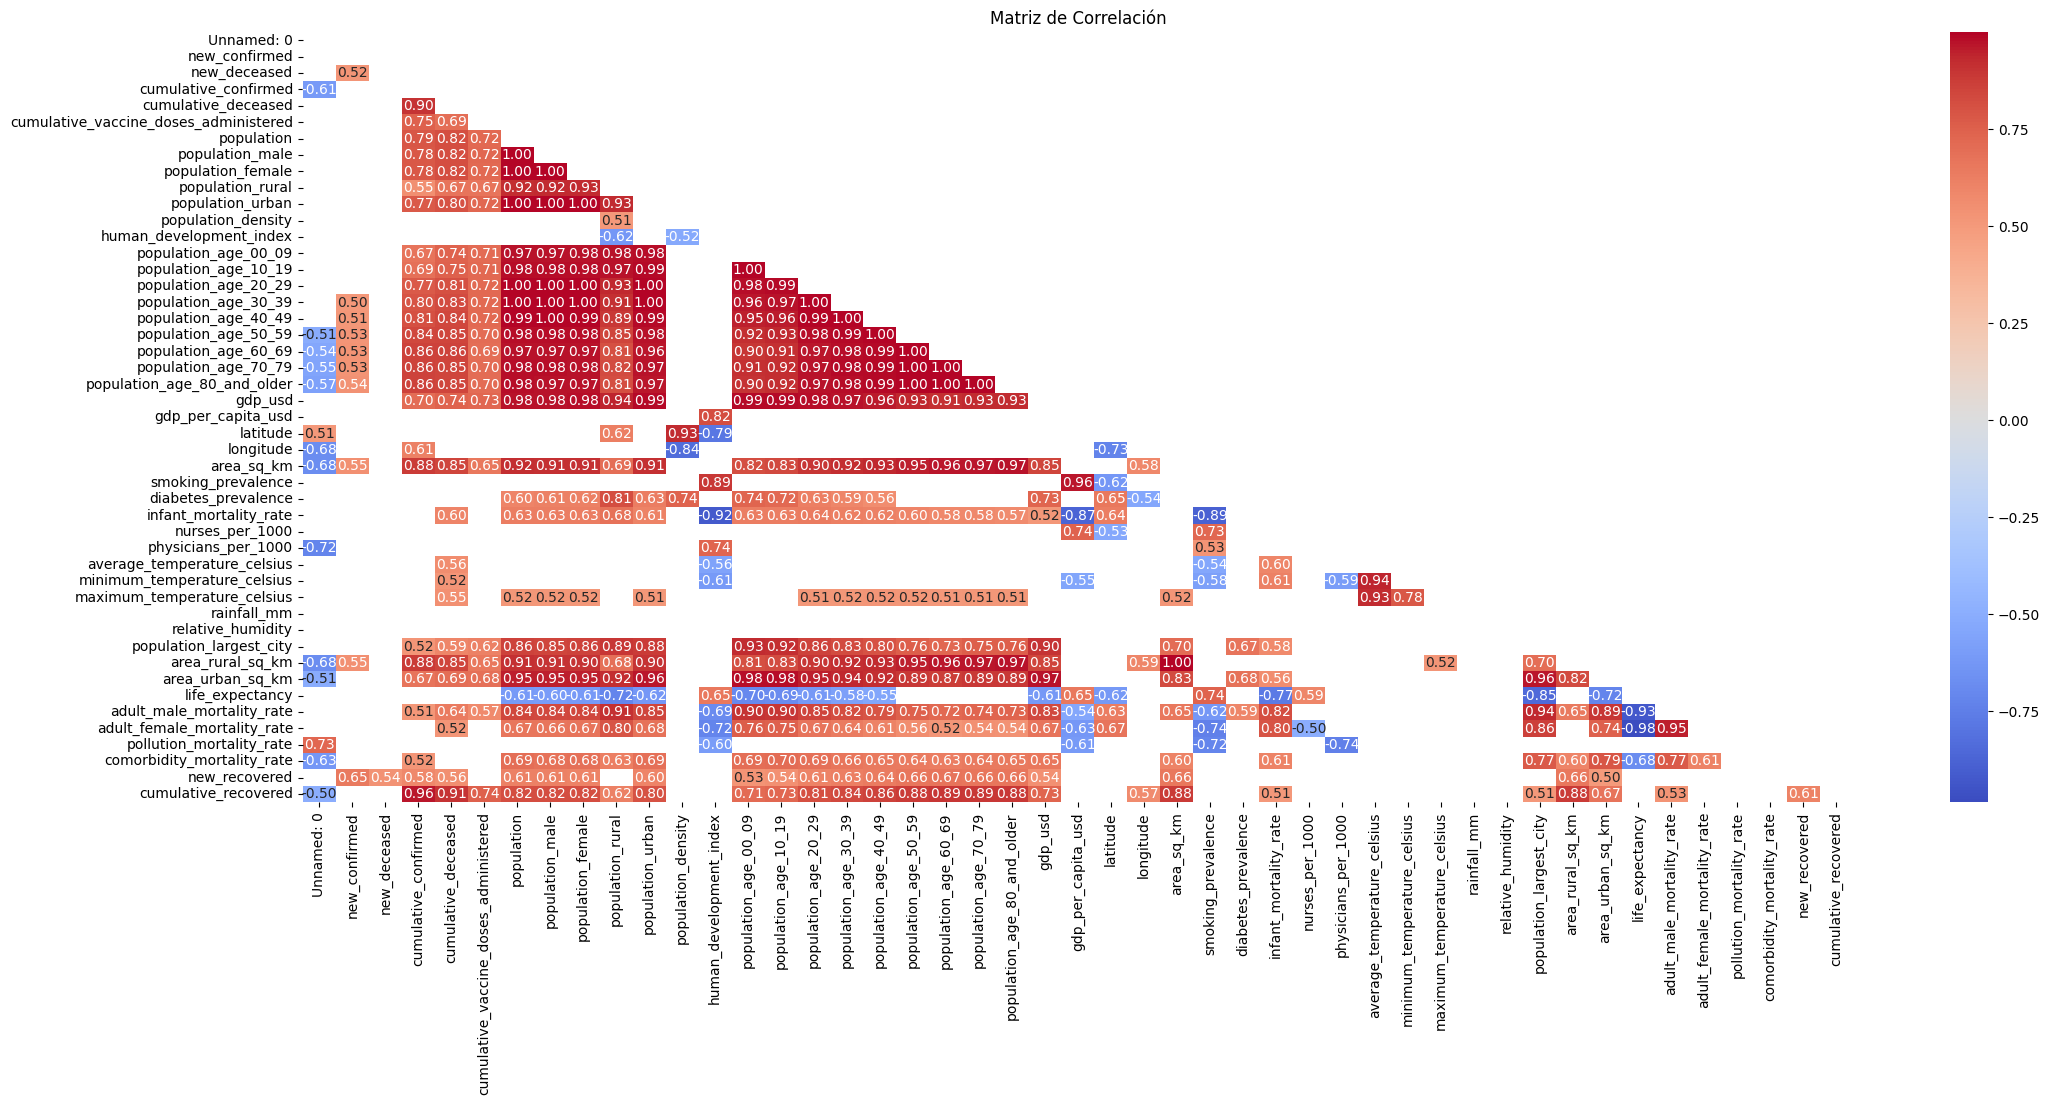

In [7]:
#Realizamos la grafica

plt.figure(figsize= (25,10))
heatmap = sns.heatmap(matriz_correlacion, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

### Diagrama de barras de casos confirmados por pais.

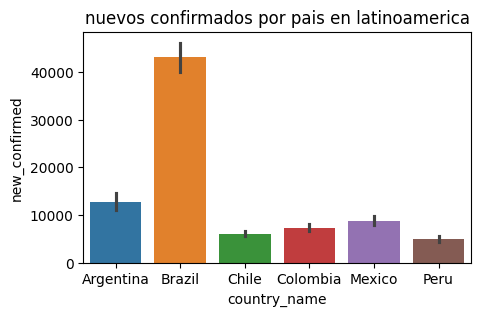

In [12]:
fig, ax = plt.subplots(figsize= ( 5,3))
sns.barplot(x='country_name', y='new_confirmed', data=dfNuevo_filtrado, ax=ax, hue='country_name')
plt.title('nuevos confirmados por pais en latinoamerica')
plt.show()

### Diagrama de barras para todos los países.

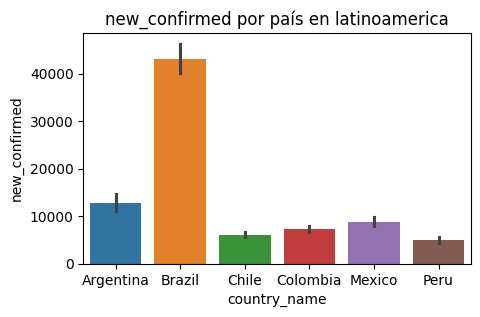

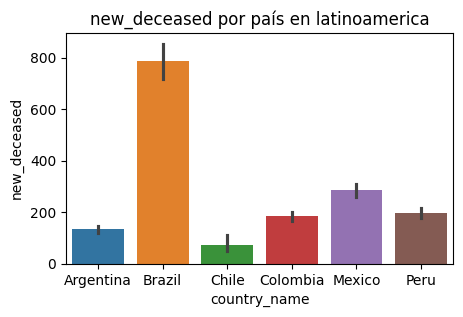

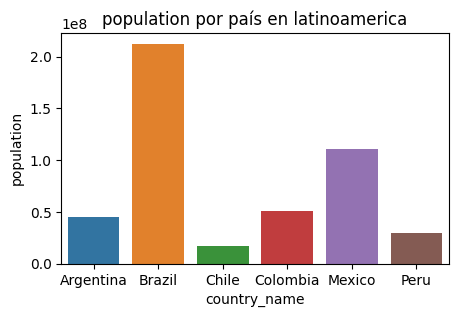

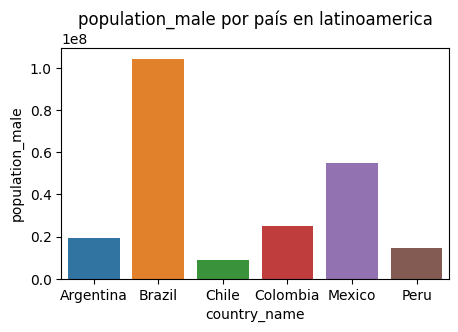

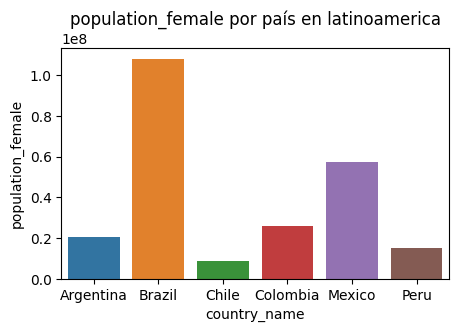

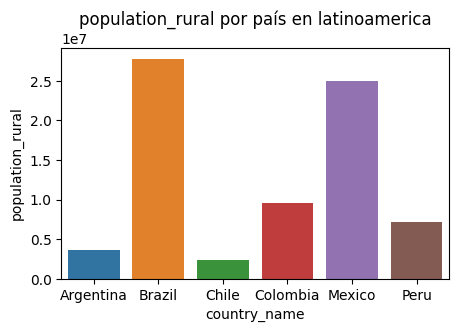

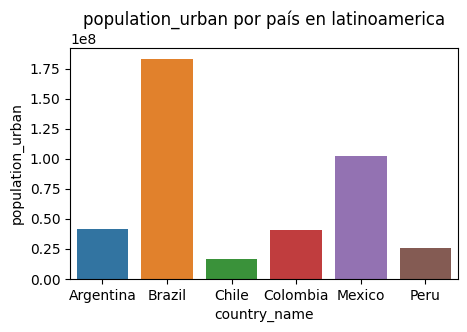

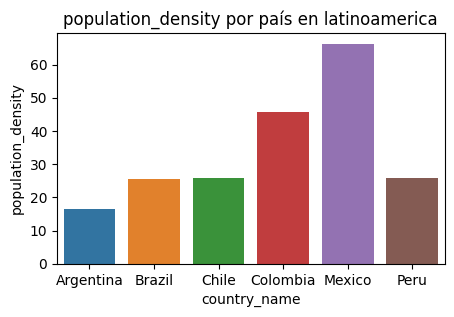

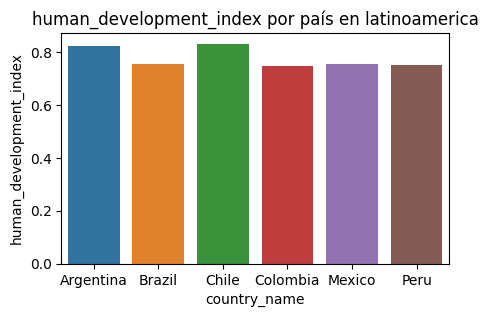

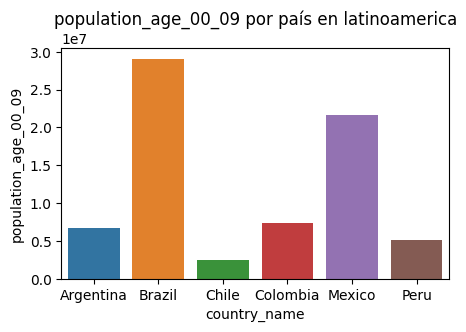

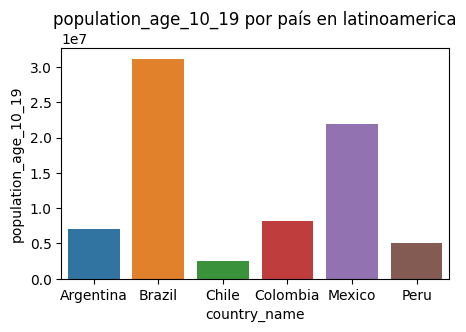

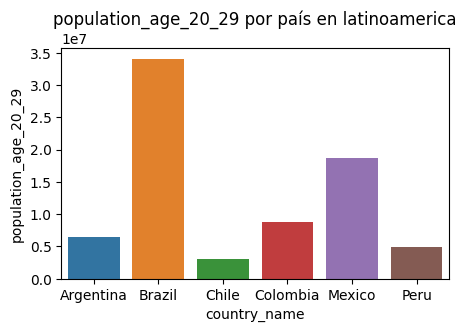

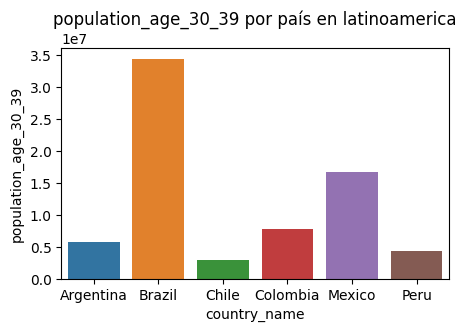

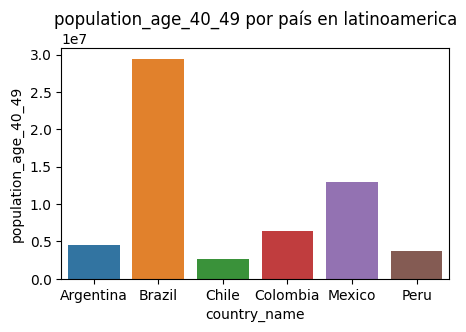

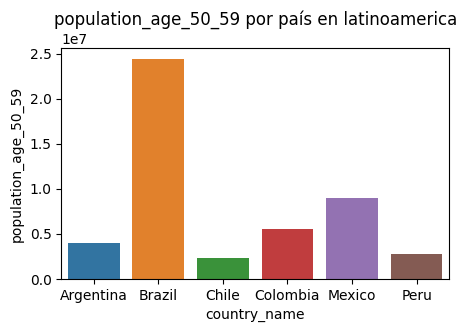

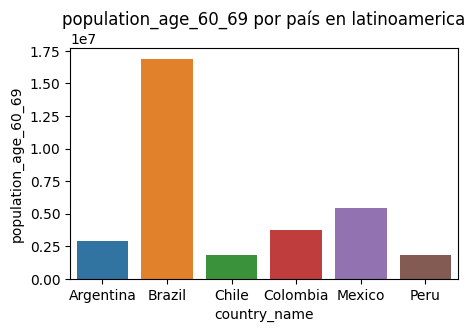

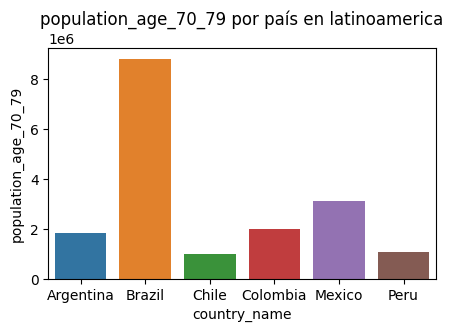

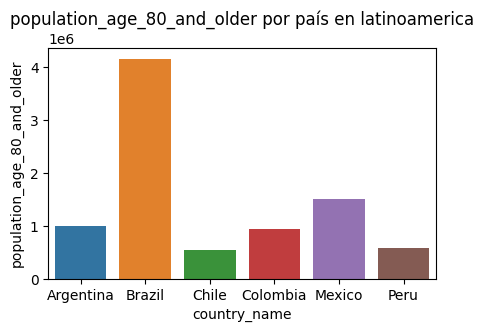

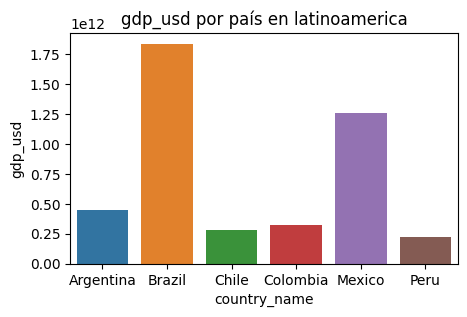

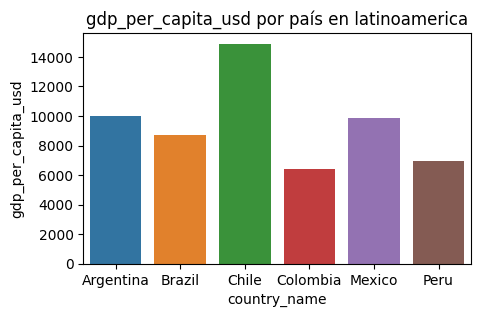

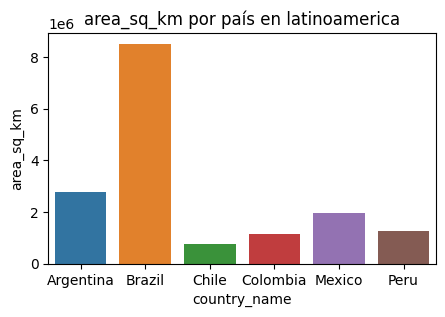

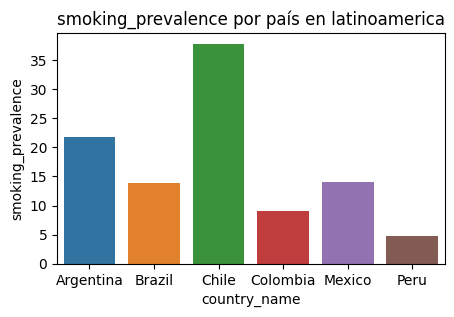

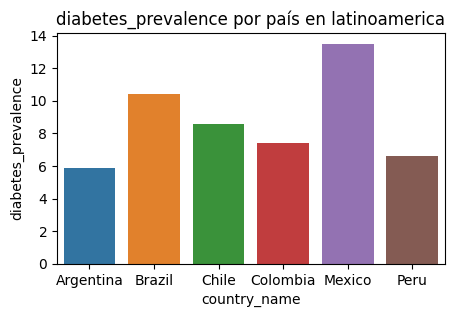

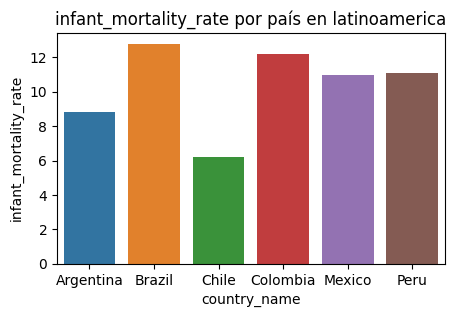

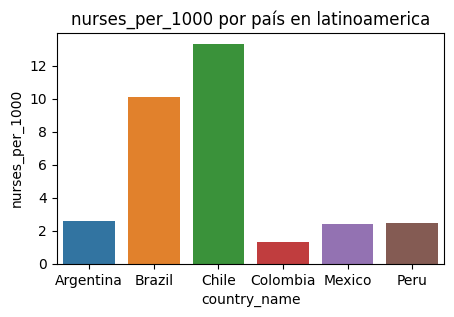

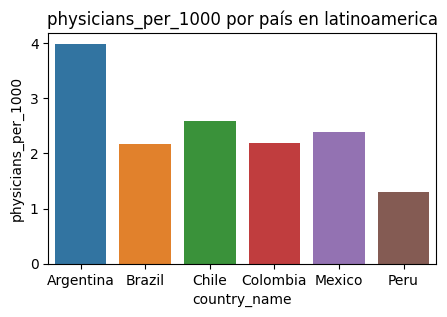

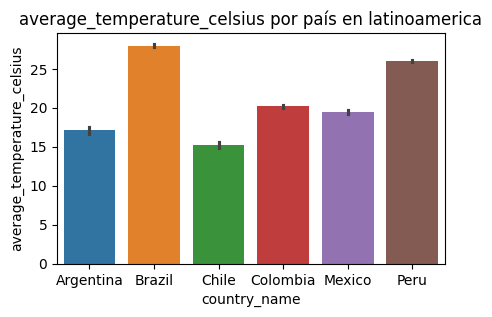

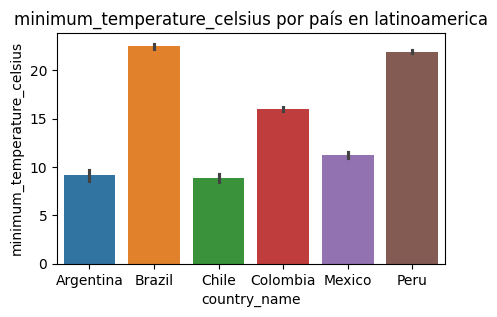

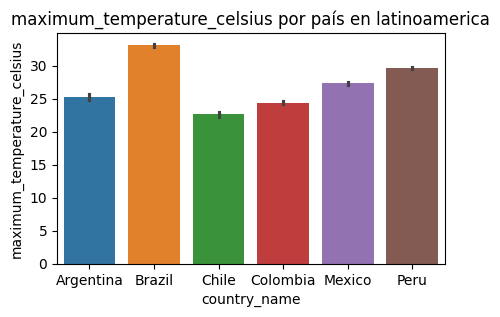

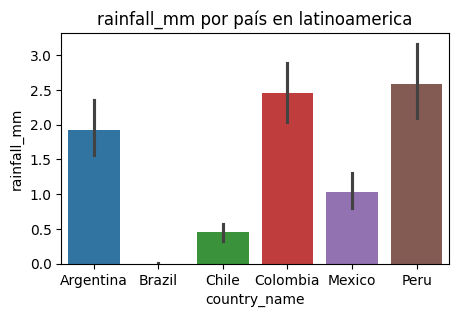

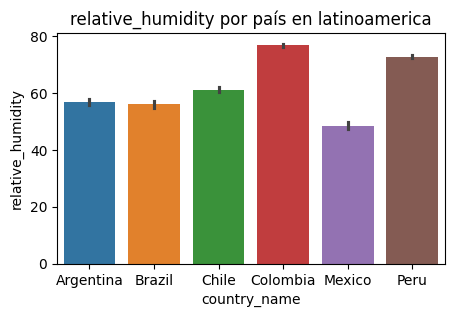

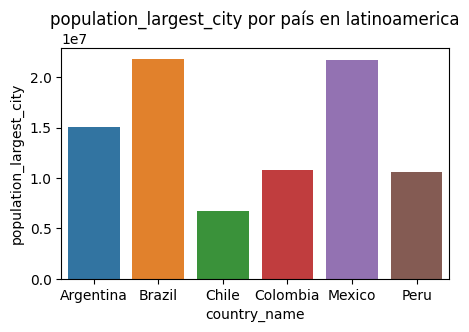

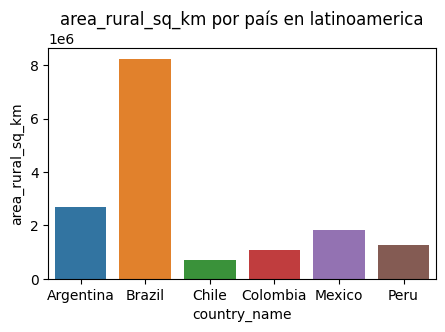

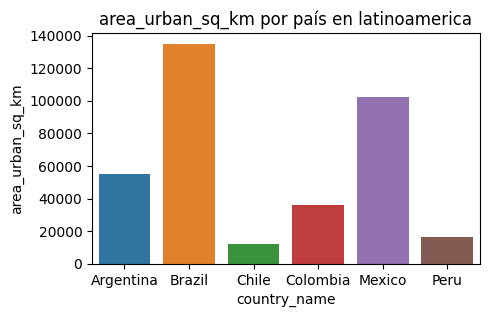

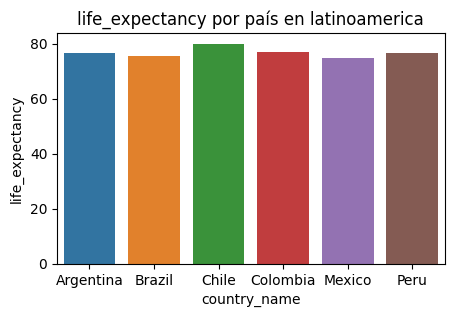

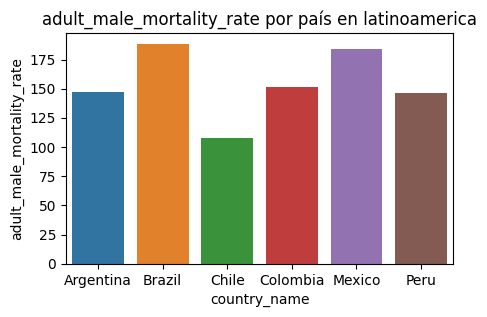

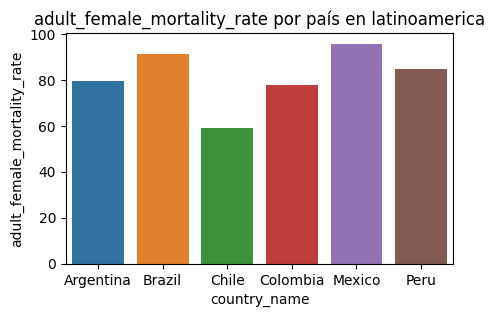

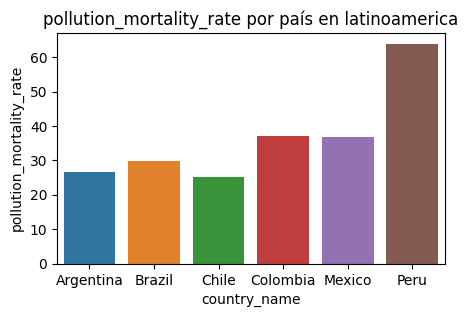

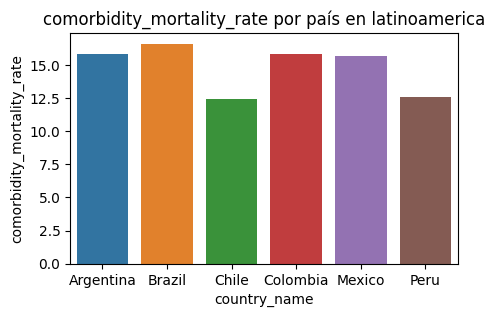

In [13]:
for i in dfNuevo_filtrado.columns:
    if i not in['country_name','location_key','date','country_code', 'latitude','longitude','cumulative_confirmed', 'cumulative_deceased','cumulative_recovered','cumulative_vaccine_doses_administered','new_recovered']:
        fig , ax = plt.subplots(figsize = (5, 3))
        sns.barplot(x='country_name', y=i, data=dfNuevo_filtrado, ax=ax, hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

En esta gráfica observamos que Brasil es el país con la mayor población y superficie. Sin embargo, no es el país con la mayor densidad poblacional. La densidad poblacional representa la cantidad de personas que viven en una unidad de área específica, generalmente expresada como el número de habitantes por kilómetro cuadrado. En este caso, México es el país con la mayor densidad poblacional.



### Historgramas con respecto a 
* Nuevos confirmados
* Nuevos decesos
* Acumulados confirmados
* Acumulados de decesos
* Acumulados de dosis administradas
* Pomedio de temperaturas
* Minimo de temperatura
* Maximo de temperatura
* Precipitaciones

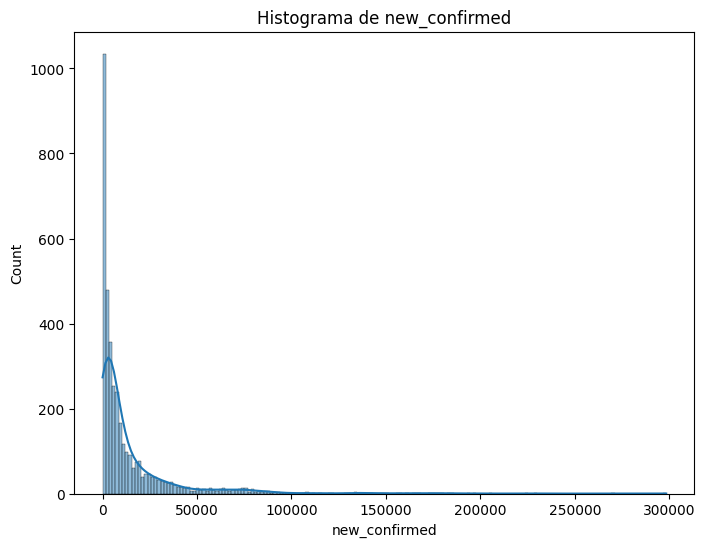

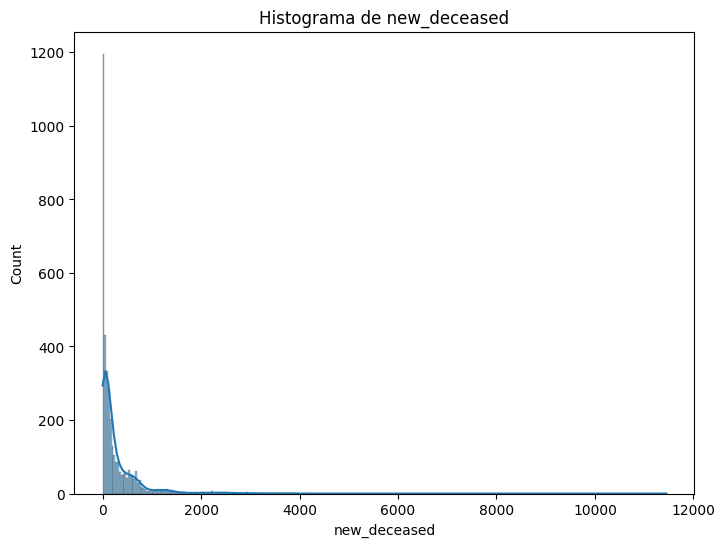

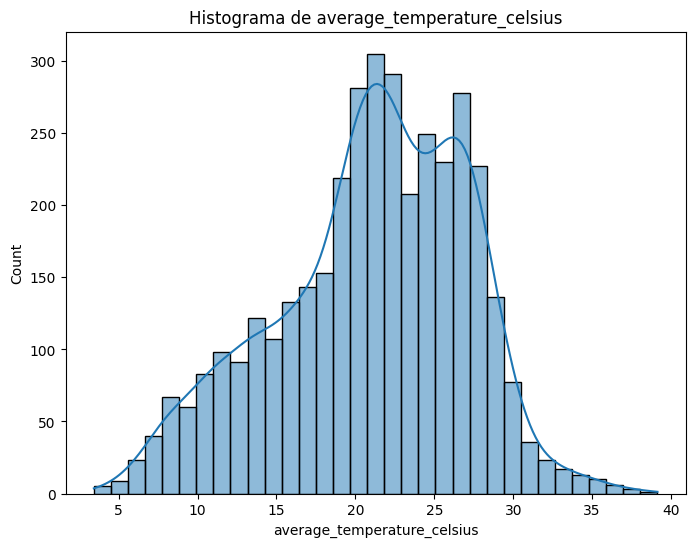

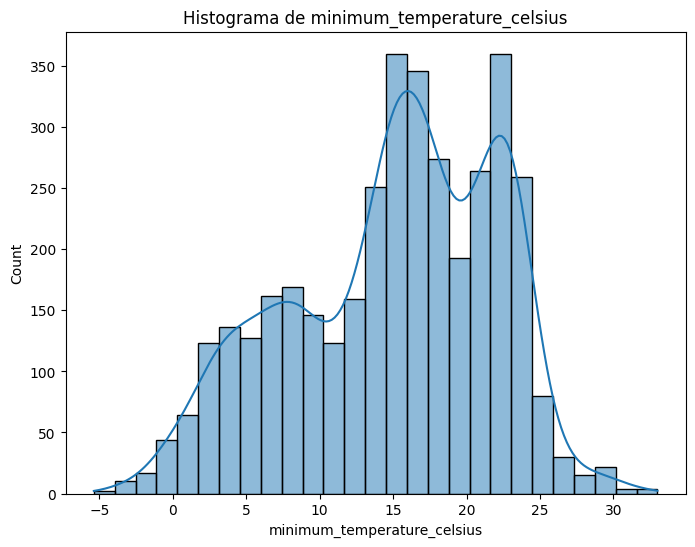

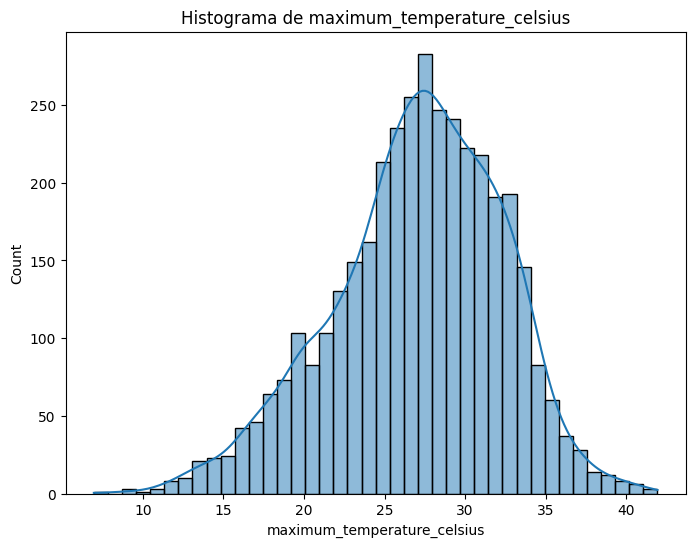

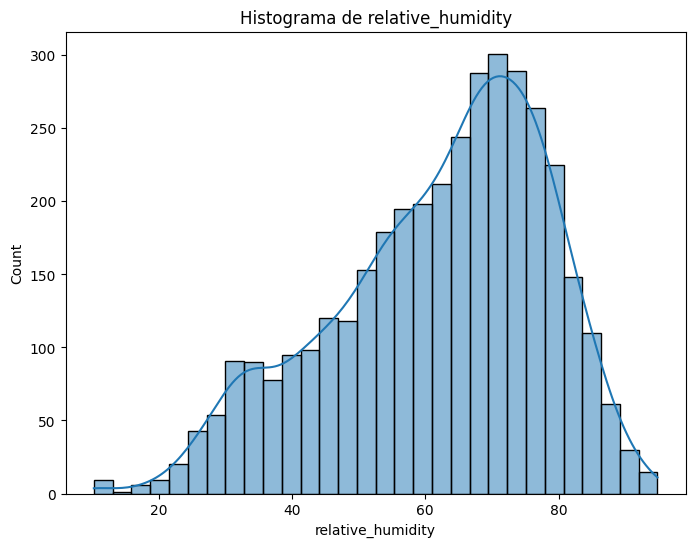

In [15]:
columnas_histogramas = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
                        'cumulative_vaccine_doses_administered', 'average_temperature_celsius','minimum_temperature_celsius',
                        'maximum_temperature_celsius','relative_humidity']

for i in dfNuevo_filtrado[columnas_histogramas]:
    if i not in['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed',
                'cumulative_deceased','cumulative_recovered','cumulative_vaccine_doses_administered']:
        fig, ax = plt.subplots(figsize=(8,6))
        sns.histplot(dfNuevo_filtrado[i], kde=True)
        plt.title(f"Histograma de {i}")
        plt.show()

### Diagrama de dispersion de la temperatura media contra los casos confirmados.

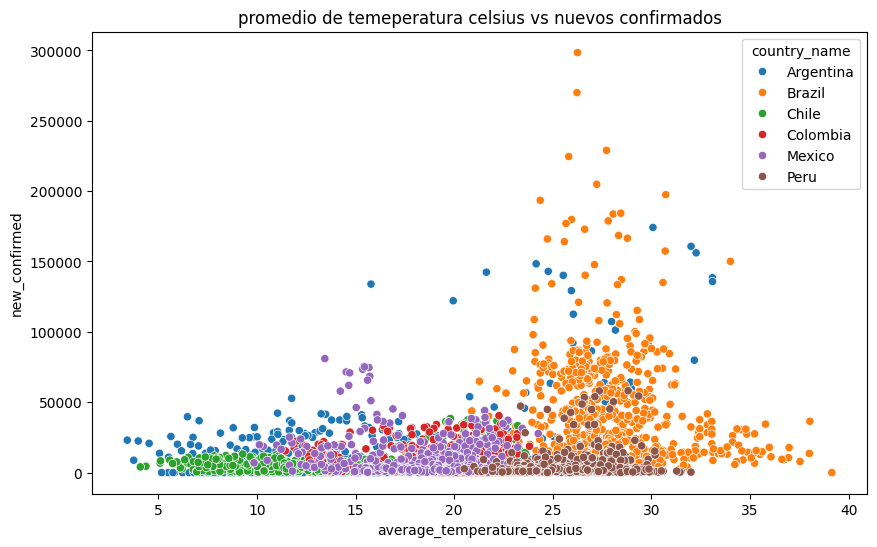

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=dfNuevo_filtrado, hue='country_name')
plt.title('promedio de temeperatura celsius vs nuevos confirmados')
plt.show()

En el gráfico podemos observar la relación entre las temperaturas y los casos de COVID-19. Se muestra que en los lugares más cálidos, los casos han sido más frecuentes con el aumento de temperatura. Esto implica una mayor cantidad de casos en países como Brasil y México, que tienen climas más tropicales y presentan una mayor incidencia de casos.

### Diagrama de dispersion de la temperatura media contra las muertes confirmadas.

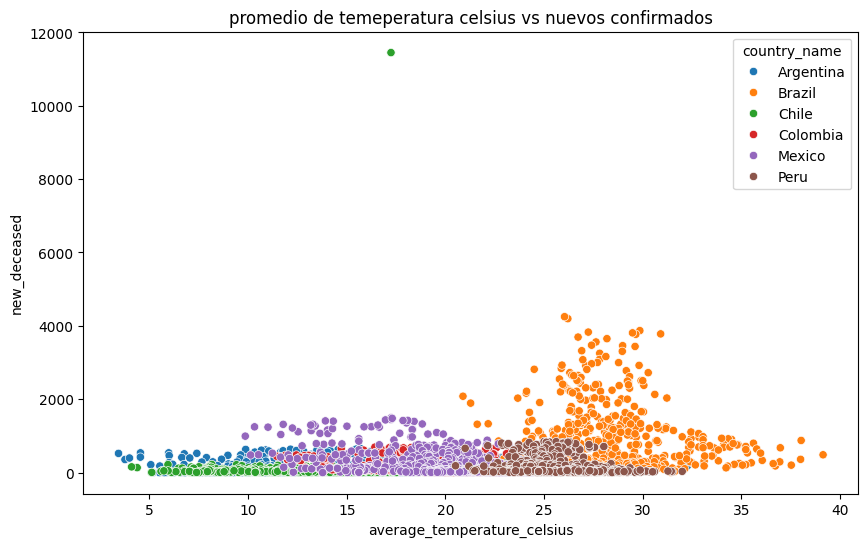

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=dfNuevo_filtrado, hue='country_name')
plt.title('promedio de temeperatura celsius vs nuevos confirmados')
plt.show()

Al igual que en el gráfico de dispersión anterior, en este gráfico observamos cómo el predominio de los países con temperaturas más cálidas también afecta al porcentaje de personas fallecidas. Exceptuando un caso aislado de Chile, los países que siguen predominando en esta estadística son Brasil y México.


### Dosis de vacunas administradas por mes .

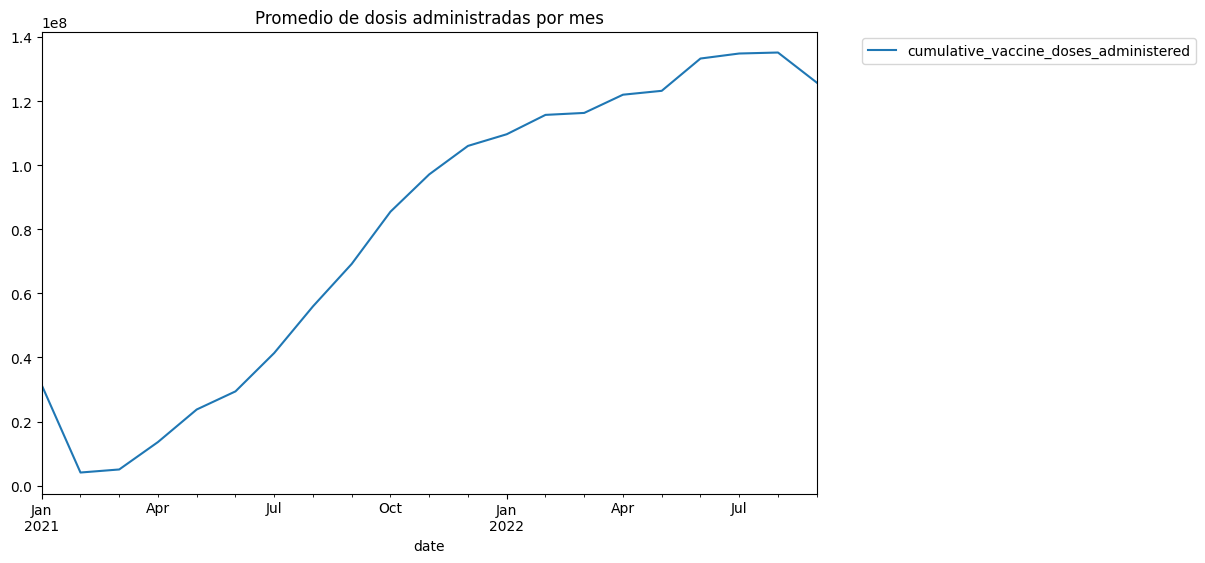

In [18]:
fig , ax = plt.subplots(figsize=(10, 6))
dfNuevo_filtrado.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Promedio de dosis administradas por mes')
plt.legend(bbox_to_anchor=(1.05, 1), loc= 'upper left')
plt.show()

### Creamos una variable con los nombres de los paises para que usaremos en los .

In [19]:
PaisesNuevos = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']

### Dosis de vacunas administradas por mes por pais.

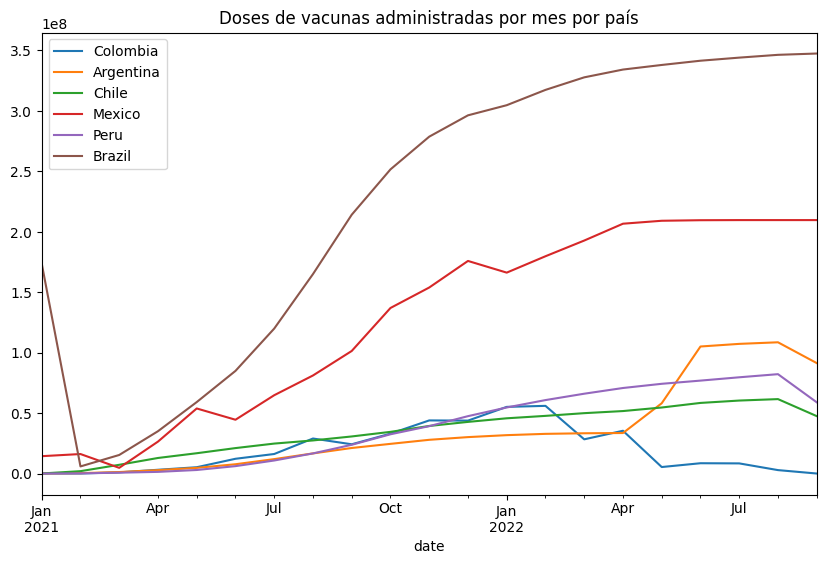

In [20]:
fig, ax = plt.subplots(figsize= (10, 6))
for i in PaisesNuevos:
    dfNuevo_filtrado[dfNuevo_filtrado['country_name'] == i].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Doses de vacunas administradas por mes por país')
plt.legend(bbox_to_anchor =(1.05, 1), loc='upper left')
plt.legend(PaisesNuevos)
plt.show()

Las dosis administradas coinciden con gráficos anteriores, donde Brasil y México, siendo los países con mayor población y superficie, muestran la mayor cantidad de vacunas administradas. Este dato es importante para el estudio, ya que, considerando las altas temperaturas y la cantidad de casos, se observa un aumento en este índice. Además, la gran extensión territorial de estos dos países también es un factor relevante.

### Fallecidos por mes por país.

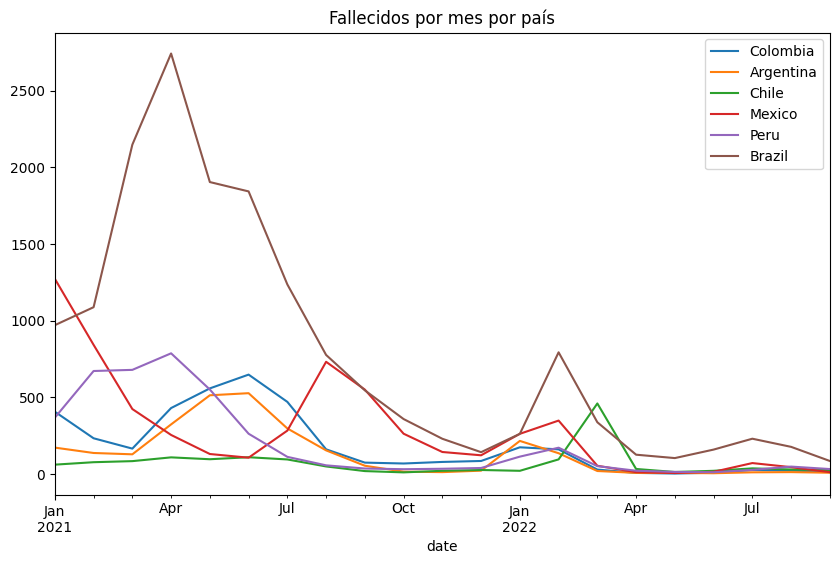

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in PaisesNuevos:
    dfNuevo_filtrado[dfNuevo_filtrado['country_name'] ==i].resample('ME').mean(numeric_only=True)['new_deceased'].plot()
plt.title('Fallecidos por mes por país')
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left')
plt.legend(PaisesNuevos)
plt.show()

En este gráfico observamos que Brasil sigue siendo el principal protagonista en cuanto a aumentos y decesos, analizados mes a mes, mostrando distintos picos. México y Chile han mostrado variaciones durante el inicio del año 2022, coincidiendo con altas temperaturas. Por otro lado, Perú, Argentina y Colombia han tenido un mayor control, disminuyendo progresivamente.

### Confirmados por mes por país.

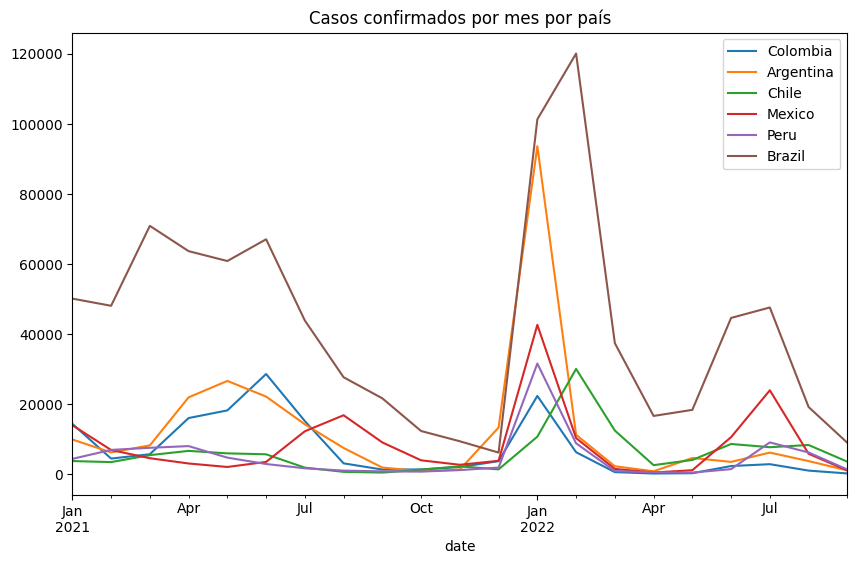

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in PaisesNuevos:
    dfNuevo_filtrado[dfNuevo_filtrado['country_name'] == i].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Casos confirmados por mes por país')
plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left')
plt.legend(PaisesNuevos)
plt.show()

### Recuperados por mes por país.

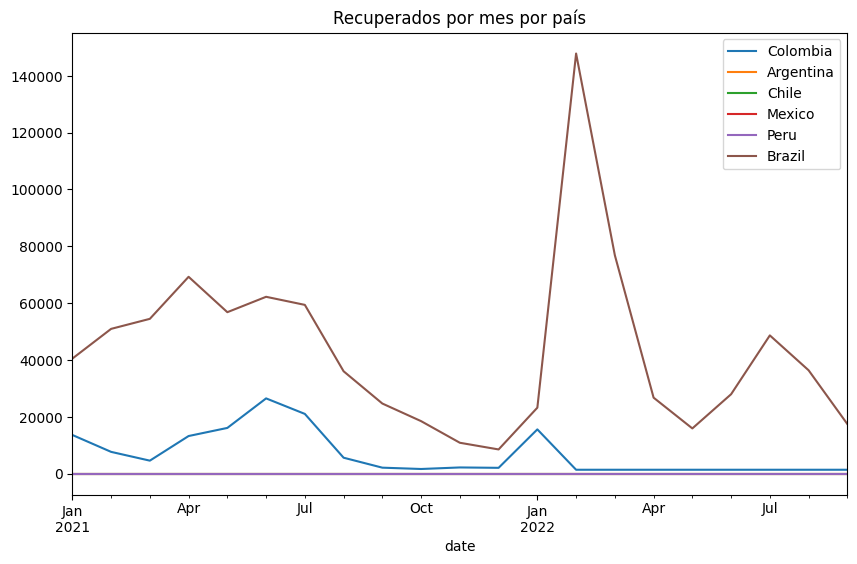

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in PaisesNuevos: 
    dfNuevo_filtrado[dfNuevo_filtrado['country_name'] == i].resample('ME').mean(numeric_only=True)['new_recovered'].plot()
plt.title('Recuperados por mes por país')
plt.legend(bbox_to_anchor =(1.05, 1), loc ='upper left')
plt.legend(PaisesNuevos)
plt.show()

En esta columna falta datos, ya que nos muestra solo el grafico de tres paises: Peru, Colombia y Brazil.
Nos faltarian datos de Argentina, Chile y Mexico.

### Distribucion de las vacunas por pais.

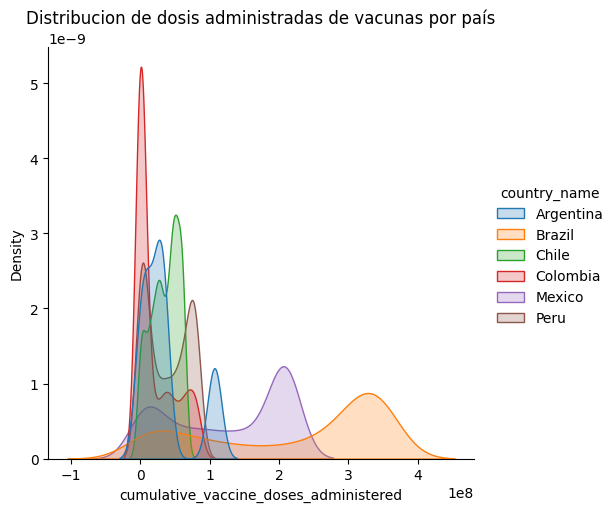

In [24]:
sns.displot(dfNuevo_filtrado, x='cumulative_vaccine_doses_administered', hue='country_name', kind='kde', fill=True)
plt.title('Distribucion de dosis administradas de vacunas por país')
plt.show()

### Estadistica de temperatura media por país.

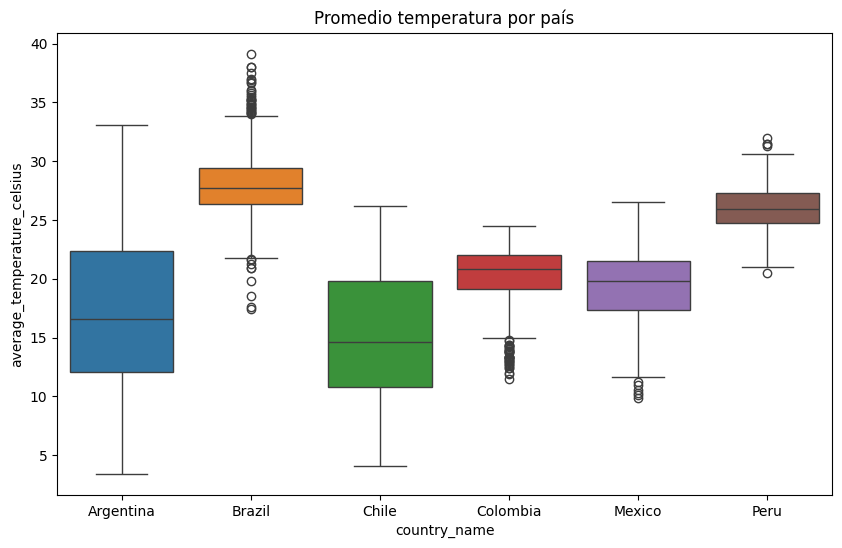

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data= dfNuevo_filtrado, hue='country_name')
plt.title('Promedio temperatura por país')
plt.show()

Aquí podemos observar algunos valores atípicos en distintos países, como Brasil, Colombia, México y Perú. En el caso de Brasil, se registran tanto temperaturas más altas como más bajas de lo habitual. Esto también ocurre en Colombia y México, donde se observan temperaturas atípicamente bajas.

### Casos confirmados por pais.

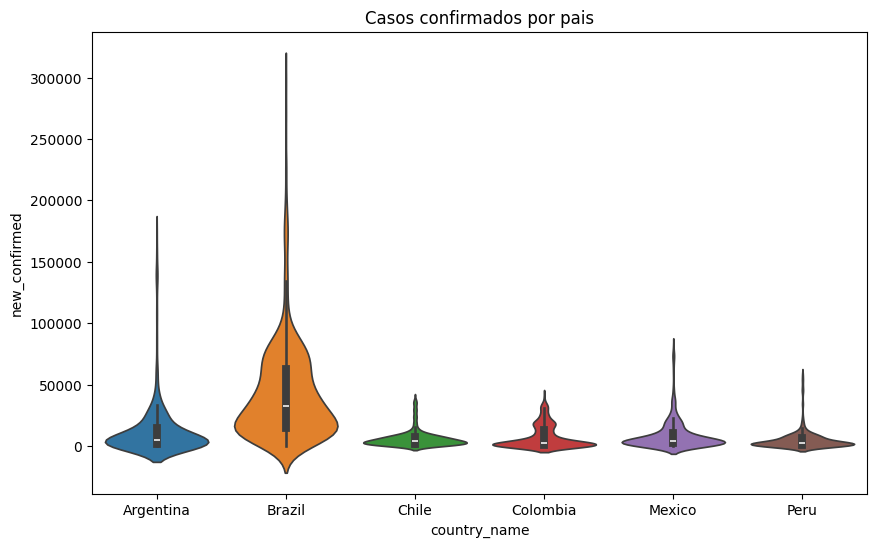

In [26]:
fig, ax=plt.subplots(figsize=(10, 6))
sns.violinplot(x='country_name', y='new_confirmed', data=dfNuevo_filtrado, hue='country_name')
plt.title('Casos confirmados por pais')
plt.show()

### Graficos Violinplot de las variables que "si" tienen cambios.

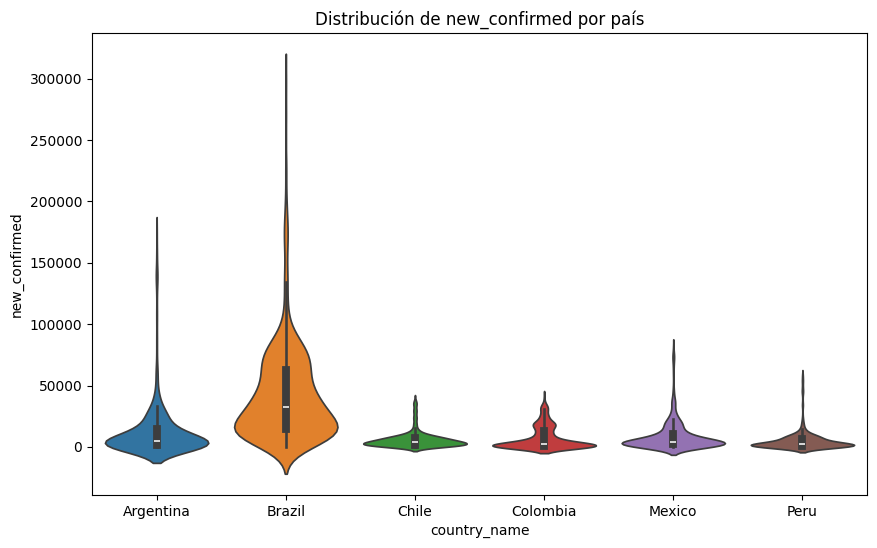

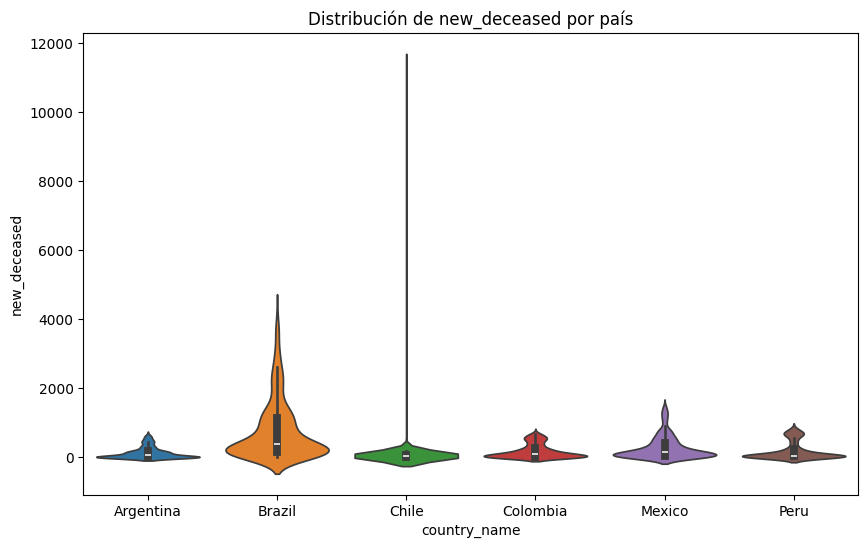

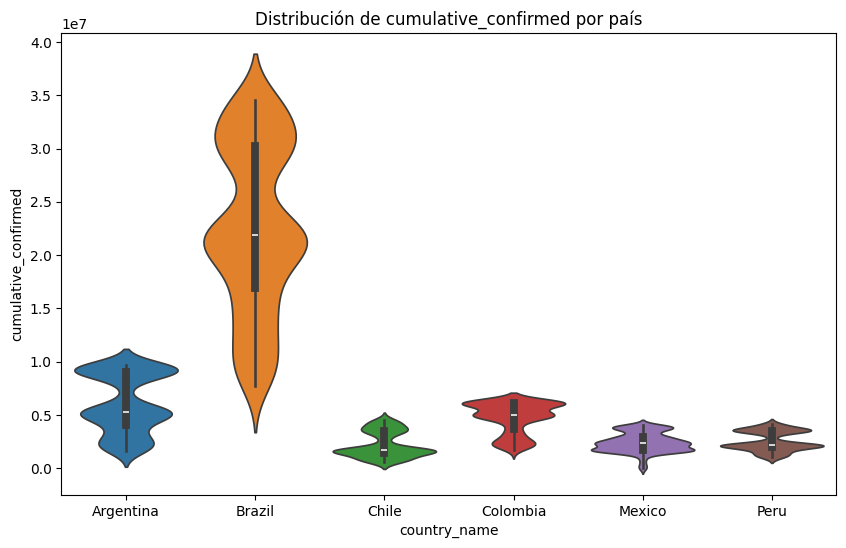

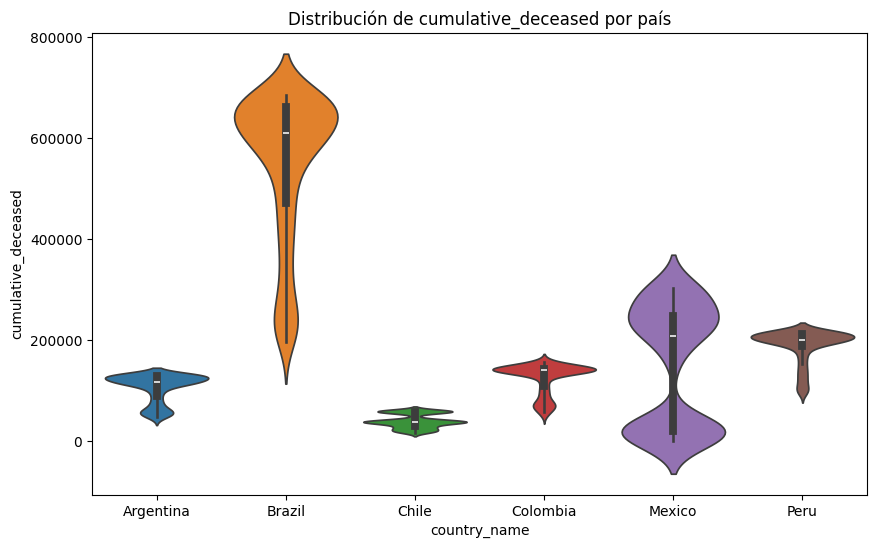

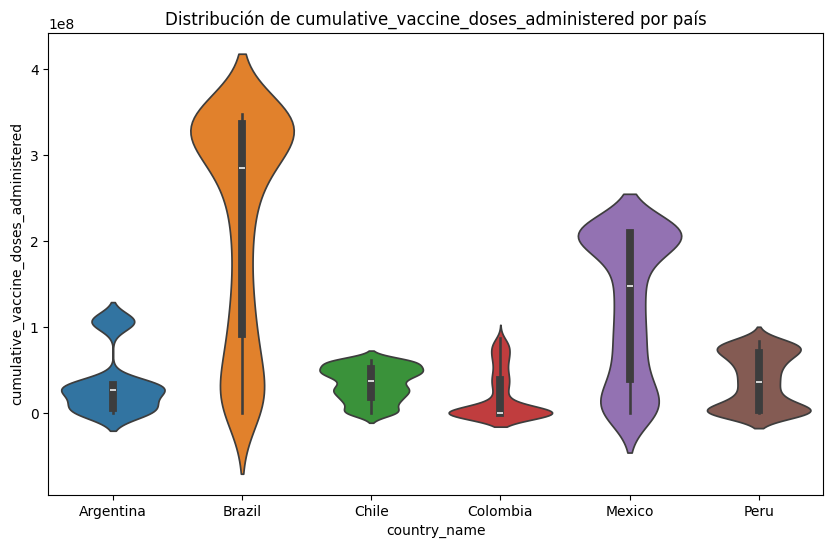

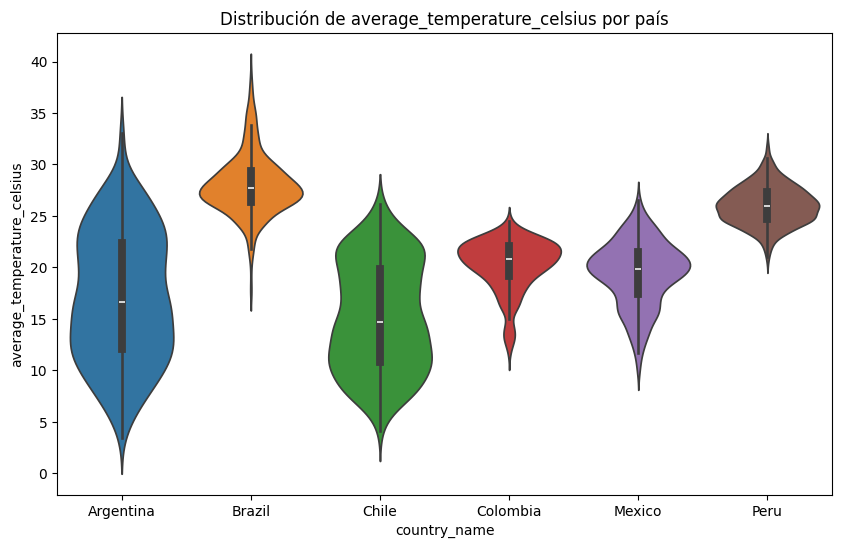

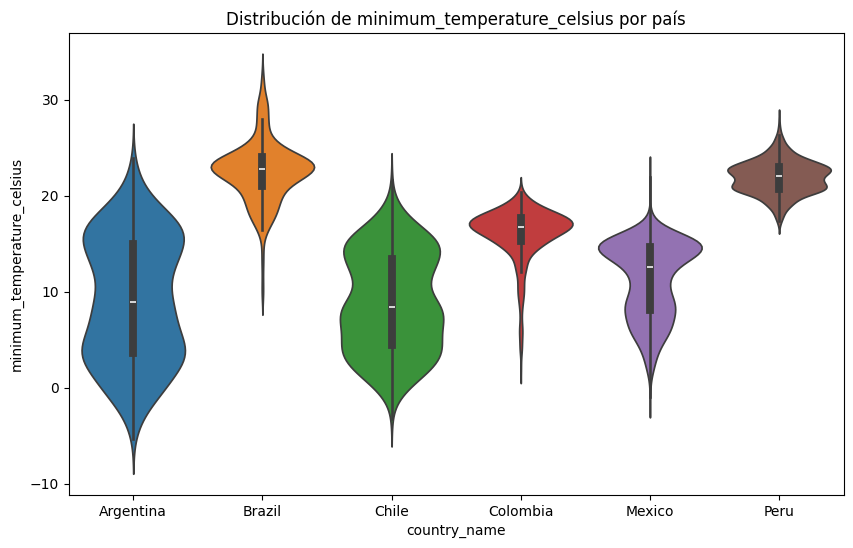

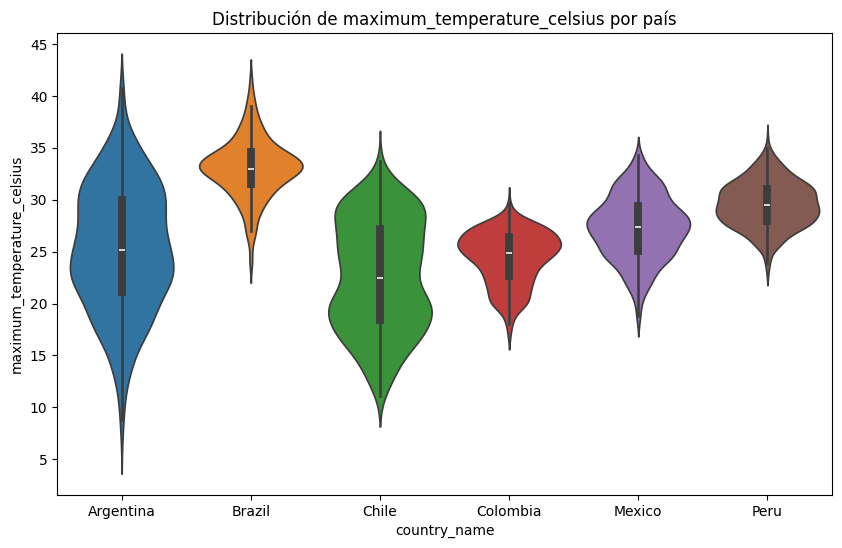

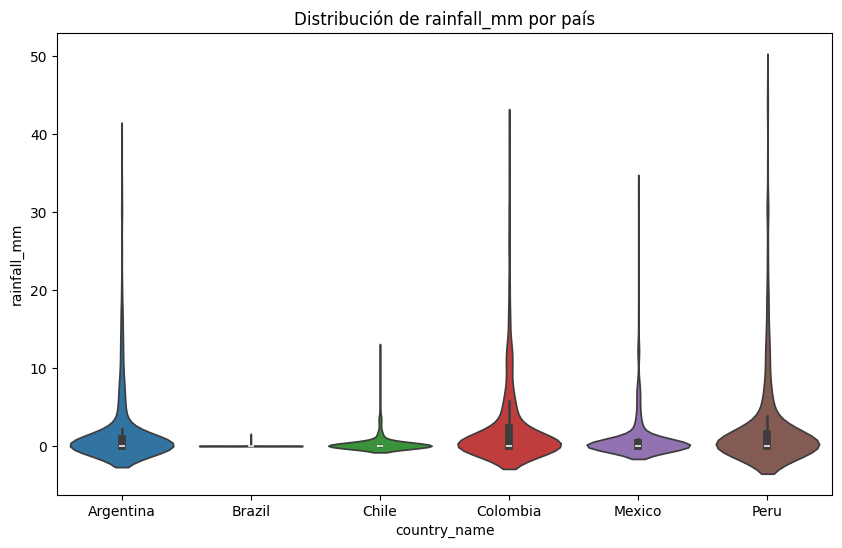

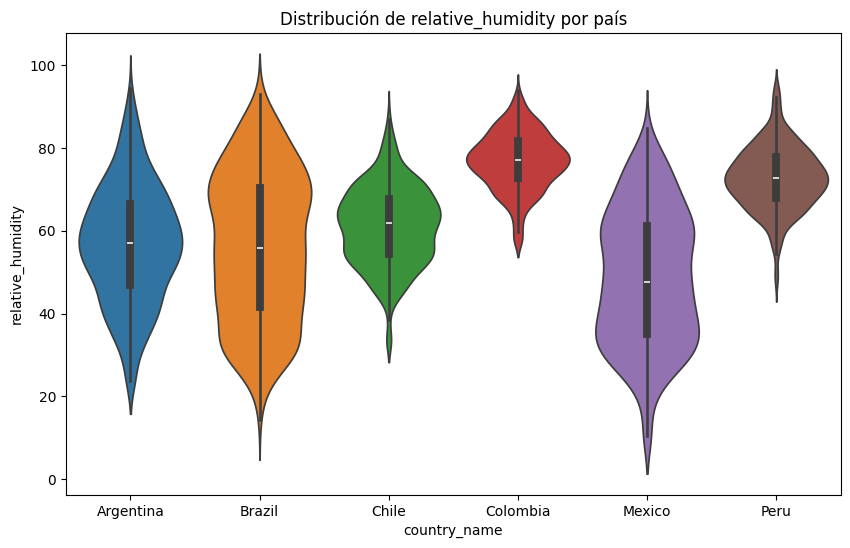

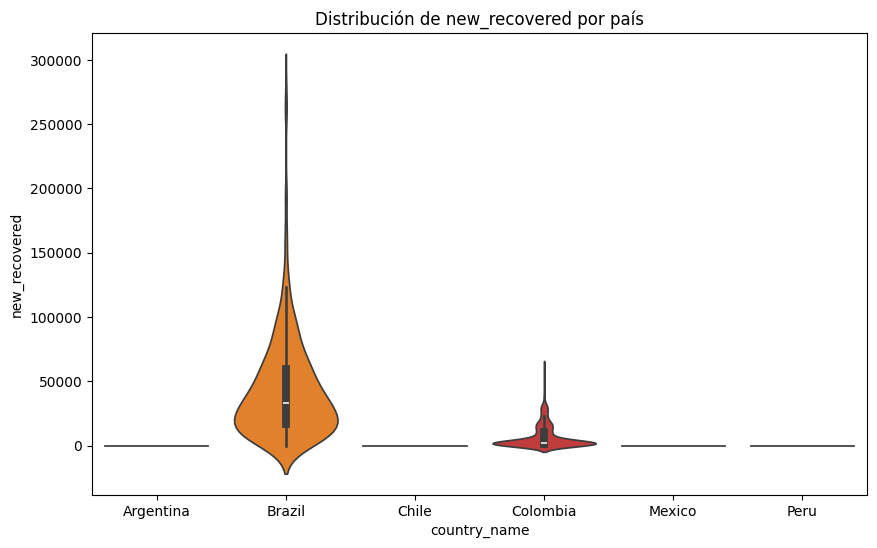

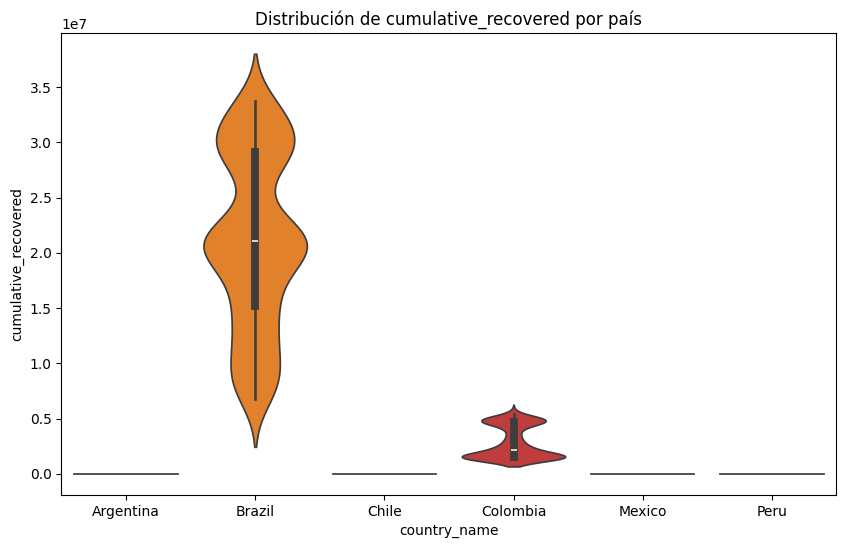

In [27]:
#se crea un dataframe
columnas_mayores_6 = []
for i in dfNuevo_filtrado:
    if i not in['location_key','date','country_code','latitude','longitude']:
        if dfNuevo_filtrado[i].nunique() > 6:
            columnas_mayores_6.append(i)

columnas_mayores_6.append('country_name')


dfNuevo_filtrado_paises_mayores = dfNuevo_filtrado[columnas_mayores_6]

for i in dfNuevo_filtrado_paises_mayores.columns:
    if i not in['location_key','date', 'country_name','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=dfNuevo_filtrado_paises_mayores, hue='country_name')
        plt.title(f'Distribución de {i} por país')
        plt.show()

### Distribución de la población por grupos de edad.

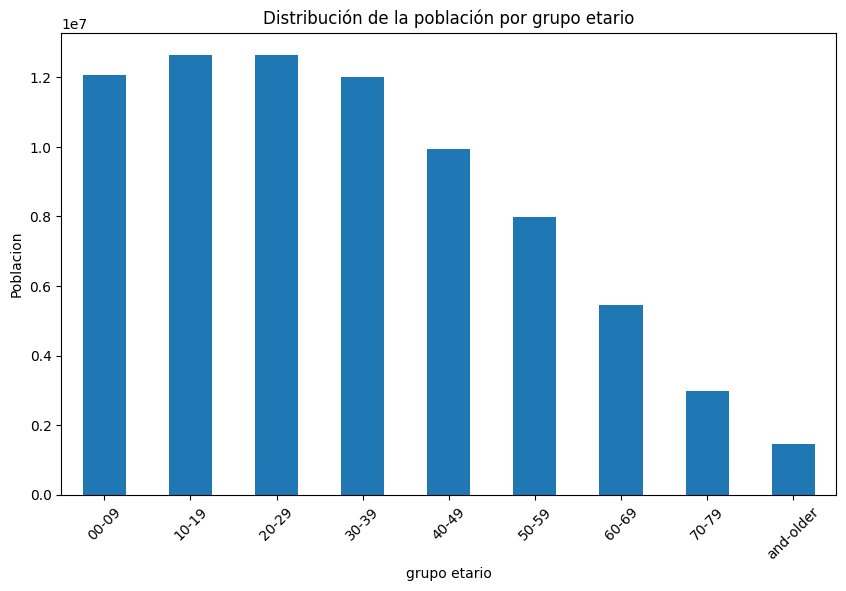

In [50]:
age_columns = ['population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39',
            'population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']

# calculamos las distribucion de la poblacion por grupos de edad
age_distribution = dfNuevo_filtrado[age_columns].mean()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar',stacked=True)
plt.xlabel('grupo etario')
plt.ylabel('Poblacion')
plt.title('Distribución de la población por grupo etario')
plt.xticks(range(len(age_columns)),[col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns],rotation = 45)
plt.show()

### Reasignacion etaria

In [29]:
dfNuevo_filtrado['population_age_00_19'] = dfNuevo_filtrado['population_age_00_09'] + dfNuevo_filtrado['population_age_10_19']
dfNuevo_filtrado['population_age_20_39'] = dfNuevo_filtrado['population_age_20_29'] + dfNuevo_filtrado['population_age_30_39']
dfNuevo_filtrado['population_age_40_59'] = dfNuevo_filtrado['population_age_40_49'] + dfNuevo_filtrado['population_age_50_59']
dfNuevo_filtrado['population_age_60_79'] = dfNuevo_filtrado['population_age_60_69'] + dfNuevo_filtrado['population_age_70_79']
dfNuevo_filtrado['population_age_80_and_older']

date
2021-01-02    994030.0
2021-01-03    994030.0
2021-01-04    994030.0
2021-01-05    994030.0
2021-01-06    994030.0
                ...   
2022-09-13    573103.0
2022-09-14    573103.0
2022-09-15    573103.0
2022-09-16    573103.0
2022-09-17    573103.0
Name: population_age_80_and_older, Length: 3744, dtype: float64

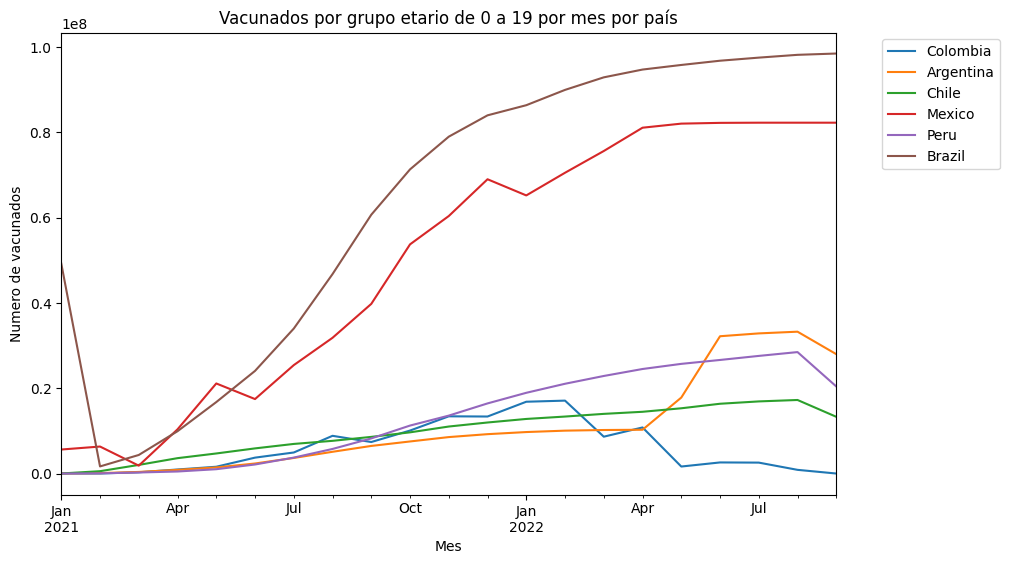

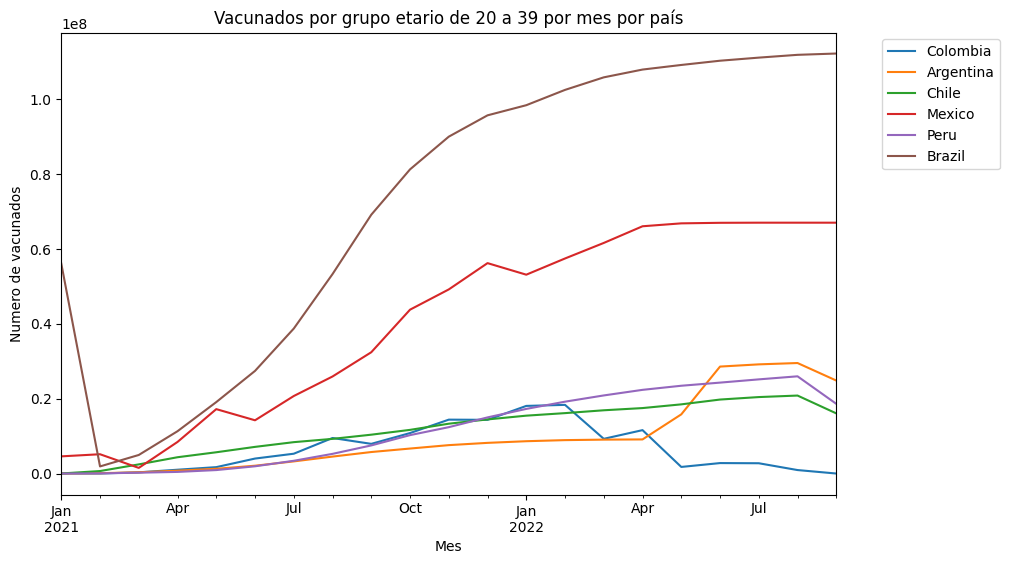

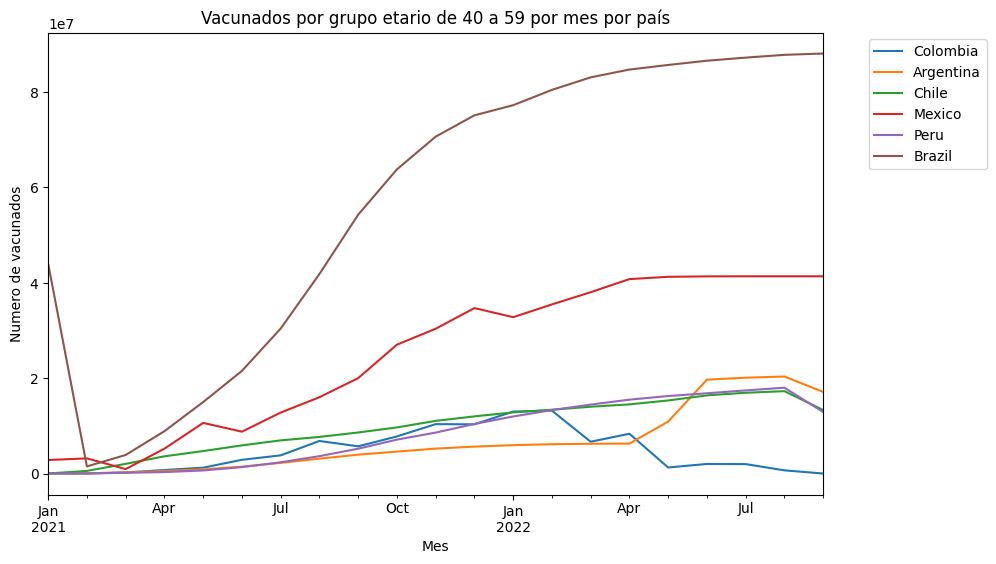

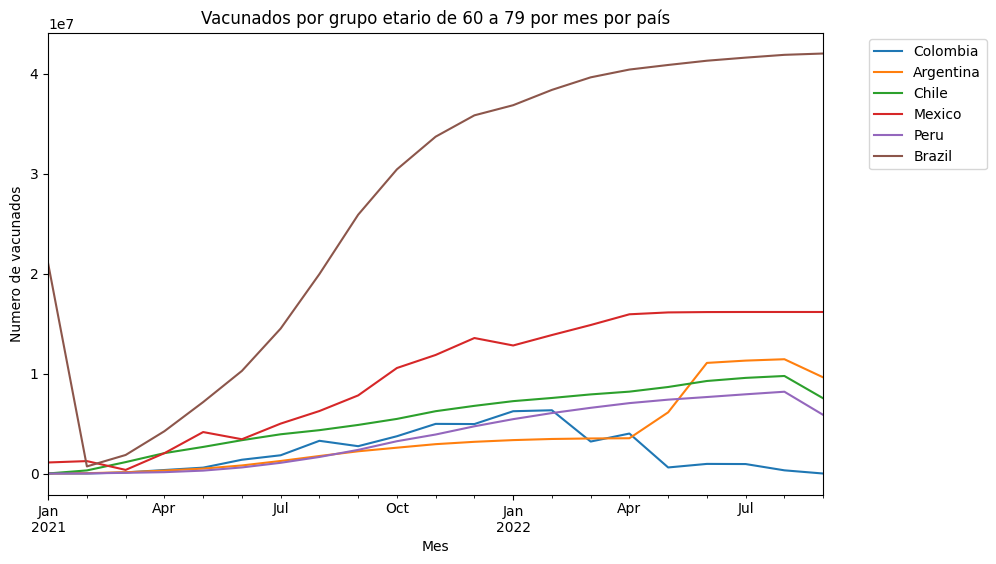

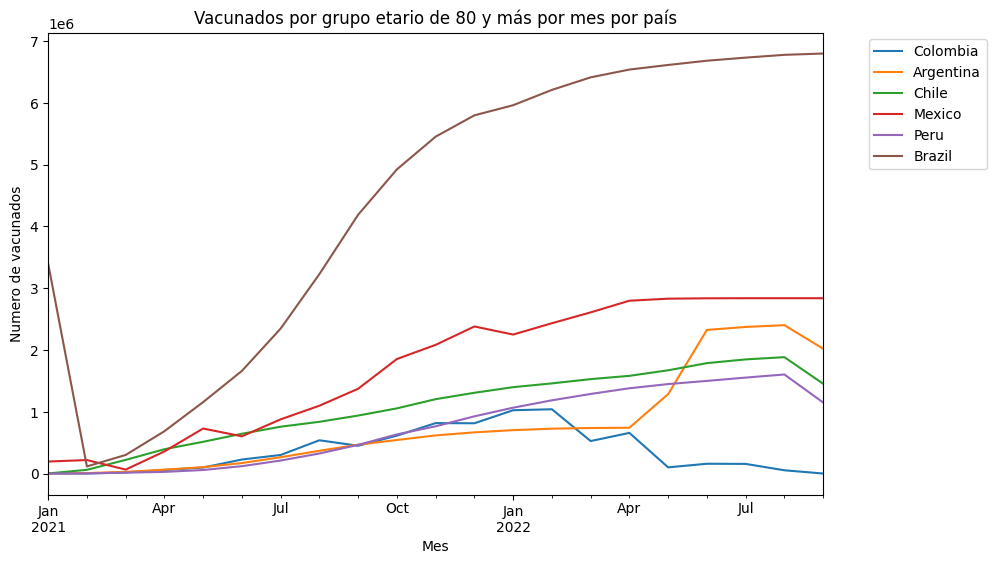

In [30]:
# Grupos etarios mas vacunados
dfNuevo_filtrado['population_age_00_19_vacunados'] = dfNuevo_filtrado['population_age_00_19'] * dfNuevo_filtrado['cumulative_vaccine_doses_administered'] / dfNuevo_filtrado['population']
dfNuevo_filtrado['population_age_20_39_vacunados'] = dfNuevo_filtrado['population_age_20_39'] * dfNuevo_filtrado['cumulative_vaccine_doses_administered'] / dfNuevo_filtrado['population']
dfNuevo_filtrado['population_age_40_59_vacunados'] = dfNuevo_filtrado['population_age_40_59'] * dfNuevo_filtrado['cumulative_vaccine_doses_administered'] / dfNuevo_filtrado['population']
dfNuevo_filtrado['population_age_60_79_vacunados'] = dfNuevo_filtrado['population_age_60_79'] * dfNuevo_filtrado['cumulative_vaccine_doses_administered'] / dfNuevo_filtrado['population']
dfNuevo_filtrado['population_age_80_and_older_vacunados'] = dfNuevo_filtrado['population_age_80_and_older'] * dfNuevo_filtrado['cumulative_vaccine_doses_administered'] / dfNuevo_filtrado['population']

# Control de nulos
dfNuevo_filtrado['population_age_00_19_vacunados'] = dfNuevo_filtrado['population_age_00_19_vacunados'].fillna(0)
dfNuevo_filtrado['population_age_20_39_vacunados'] = dfNuevo_filtrado['population_age_20_39_vacunados'].fillna(0)
dfNuevo_filtrado['population_age_40_59_vacunados'] = dfNuevo_filtrado['population_age_40_59_vacunados'].fillna(0)
dfNuevo_filtrado['population_age_60_79_vacunados'] = dfNuevo_filtrado['population_age_60_79_vacunados'].fillna(0)
dfNuevo_filtrado['population_age_80_and_older_vacunados'] = dfNuevo_filtrado['population_age_80_and_older_vacunados'].fillna(0)

# asignar tipo de dato int

dfNuevo_filtrado['population_age_00_19_vacunados'] = dfNuevo_filtrado['population_age_00_19_vacunados'].astype(int)
dfNuevo_filtrado['population_age_20_39_vacunados'] = dfNuevo_filtrado['population_age_20_39_vacunados'].astype(int)
dfNuevo_filtrado['population_age_40_59_vacunados'] = dfNuevo_filtrado['population_age_40_59_vacunados'].astype(int)
dfNuevo_filtrado['population_age_60_79_vacunados'] = dfNuevo_filtrado['population_age_60_79_vacunados'].astype(int)
dfNuevo_filtrado['population_age_80_and_older_vacunados'] = dfNuevo_filtrado['population_age_80_and_older_vacunados'].astype(int)

# Sum de vacunados por grupos etarios

dfNuevo_filtrado['population_age_00_19_vacunados'].sum()
dfNuevo_filtrado['population_age_20_39_vacunados'].sum()
dfNuevo_filtrado['population_age_40_59_vacunados'].sum()
dfNuevo_filtrado['population_age_60_79_vacunados'].sum()
dfNuevo_filtrado['population_age_80_and_older_vacunados'].sum() 

# Se define los grupos etarios con sus titulos correspndientes

age_groups = [
    ('population_age_00_19_vacunados', 'Vacunados por grupo etario de 0 a 19 por mes por país'),
    ('population_age_20_39_vacunados', 'Vacunados por grupo etario de 20 a 39 por mes por país'),
    ('population_age_40_59_vacunados', 'Vacunados por grupo etario de 40 a 59 por mes por país'),
    ('population_age_60_79_vacunados', 'Vacunados por grupo etario de 60 a 79 por mes por país'),
    ('population_age_80_and_older_vacunados', 'Vacunados por grupo etario de 80 y más por mes por país')
]
# Graficos

for age_group, title in age_groups:
    fig, ax = plt.subplots(figsize=(10, 6))
    for country in PaisesNuevos:
        dfNuevo_filtrado[dfNuevo_filtrado['country_name'] == country].resample('ME').mean(numeric_only=True)[age_group].plot(ax=ax, label=country)
    
    plt.title(title)
    plt.xlabel('Mes')
    plt.ylabel('Numero de vacunados')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


### Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

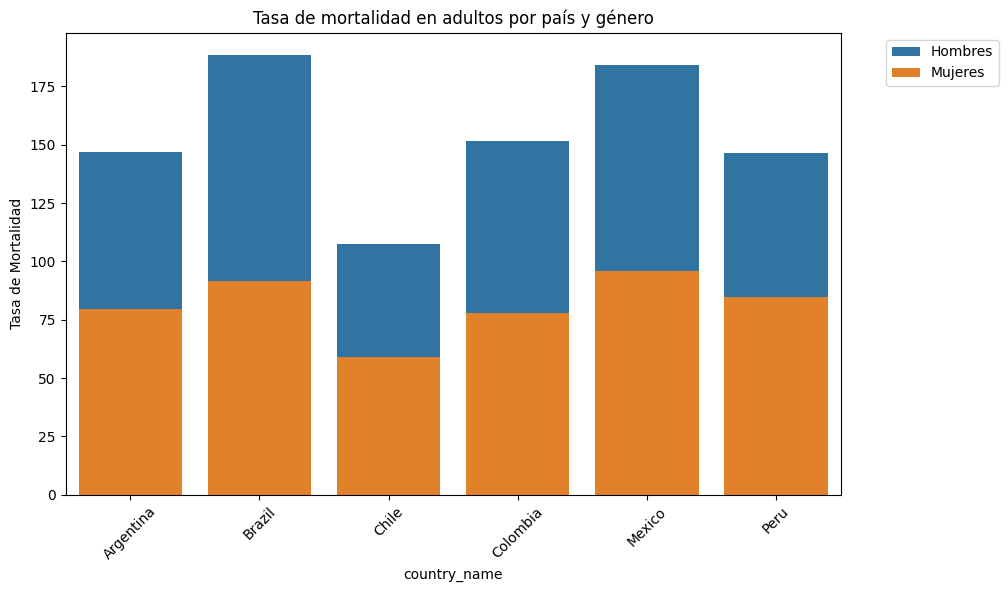

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data= dfNuevo_filtrado, x='country_name', y='adult_male_mortality_rate', label='Hombres')
sns.barplot(data= dfNuevo_filtrado, x='country_name', y='adult_female_mortality_rate',label='Mujeres')
plt.xticks(rotation=45)
plt.ylabel('Tasa de Mortalidad')
plt.title('Tasa de mortalidad en adultos por país y género')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.show()

### Matriz de correlación de indicadores demográficos y de salud.

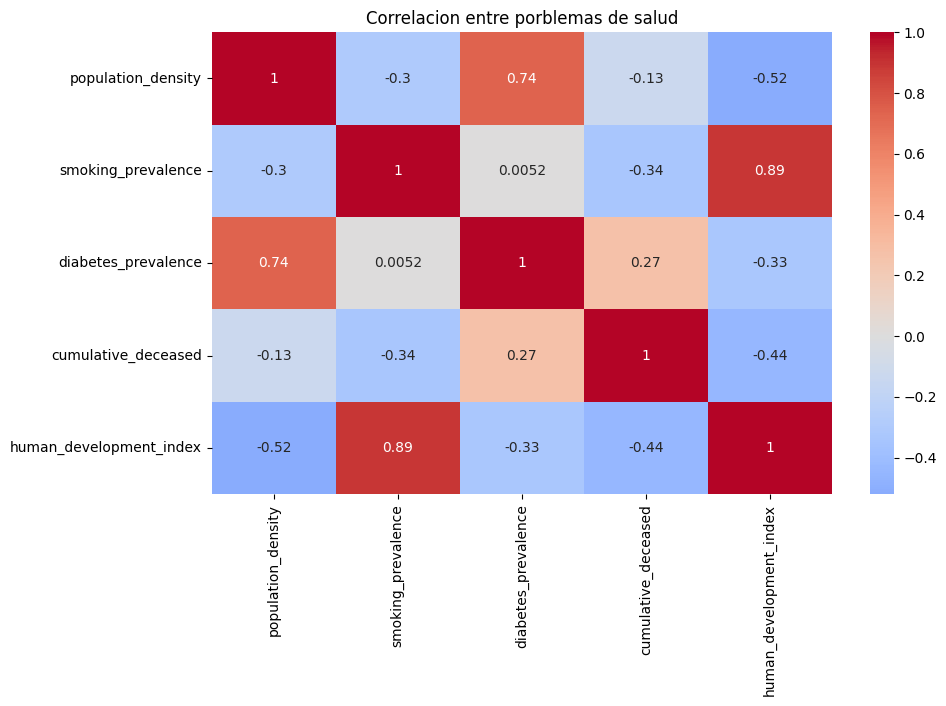

In [52]:
columnas_indicadoras_salud = ['population_density','smoking_prevalence','diabetes_prevalence','cumulative_deceased','human_development_index']
correlation_matrix_salud = dfNuevo_filtrado[columnas_indicadoras_salud].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_salud, annot=True, cmap='coolwarm', center=0)

plt.title('Correlacion entre porblemas de salud')
plt.show()


### Comparacion entre mortalidad por Covid y diabetes

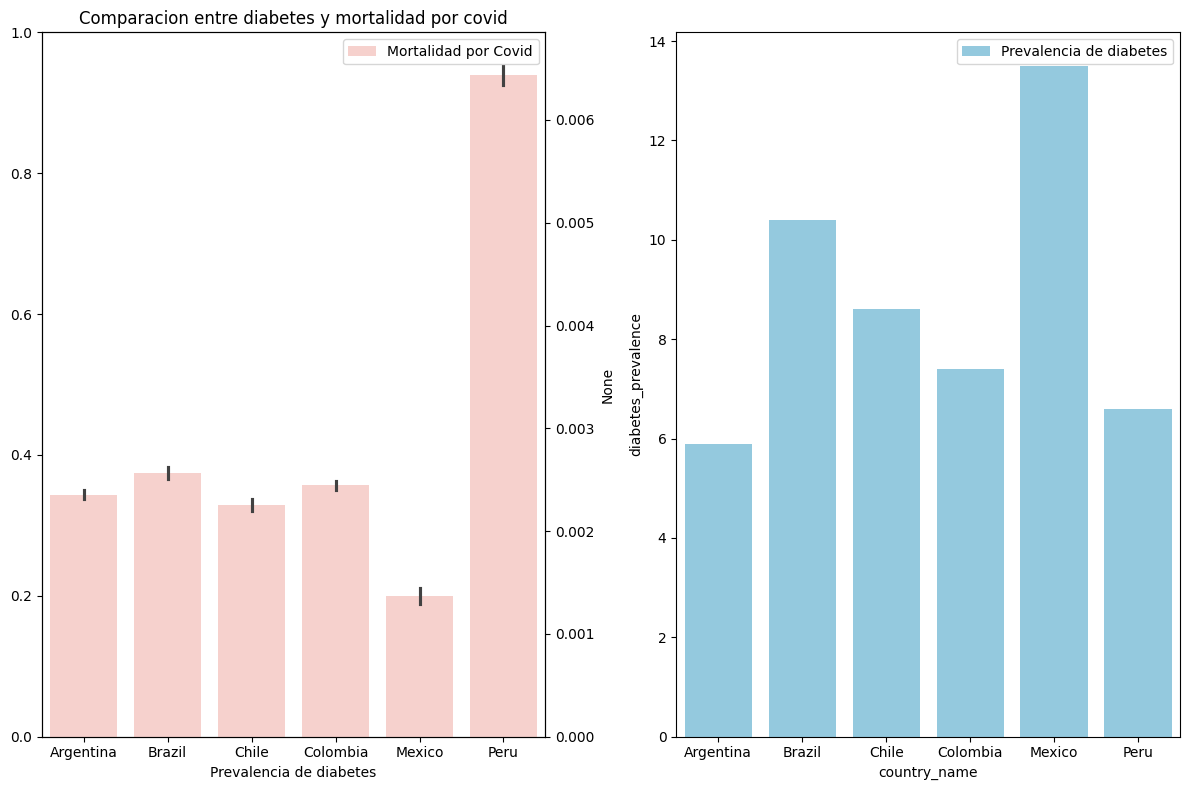

In [33]:
dfNuevo_filtrado['cumulative_deceased']= pd.to_numeric(dfNuevo_filtrado['cumulative_deceased'], errors='coerce')
dfNuevo_filtrado['population'] = pd.to_numeric(dfNuevo_filtrado['population'], errors='coerce')

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=dfNuevo_filtrado, x='country_name', y='diabetes_prevalence', color='skyblue', label='Prevalencia de diabetes')
ax2 = ax.twinx()
sns.barplot(data=dfNuevo_filtrado, x='country_name', y=dfNuevo_filtrado['cumulative_deceased'] / dfNuevo_filtrado['population'],color='salmon', ax=ax2,
            label='Mortalidad por Covid', alpha=0.4)
plt.title('Comparacion entre diabetes y mortalidad por covid')
ax.set_xlabel('Prevalencia de diabetes')
ax2.set_xlabel('Mortalidad por Covid')
plt.tight_layout()
plt.show()


### Comparacion entre mortalidad por Covid y fumadores

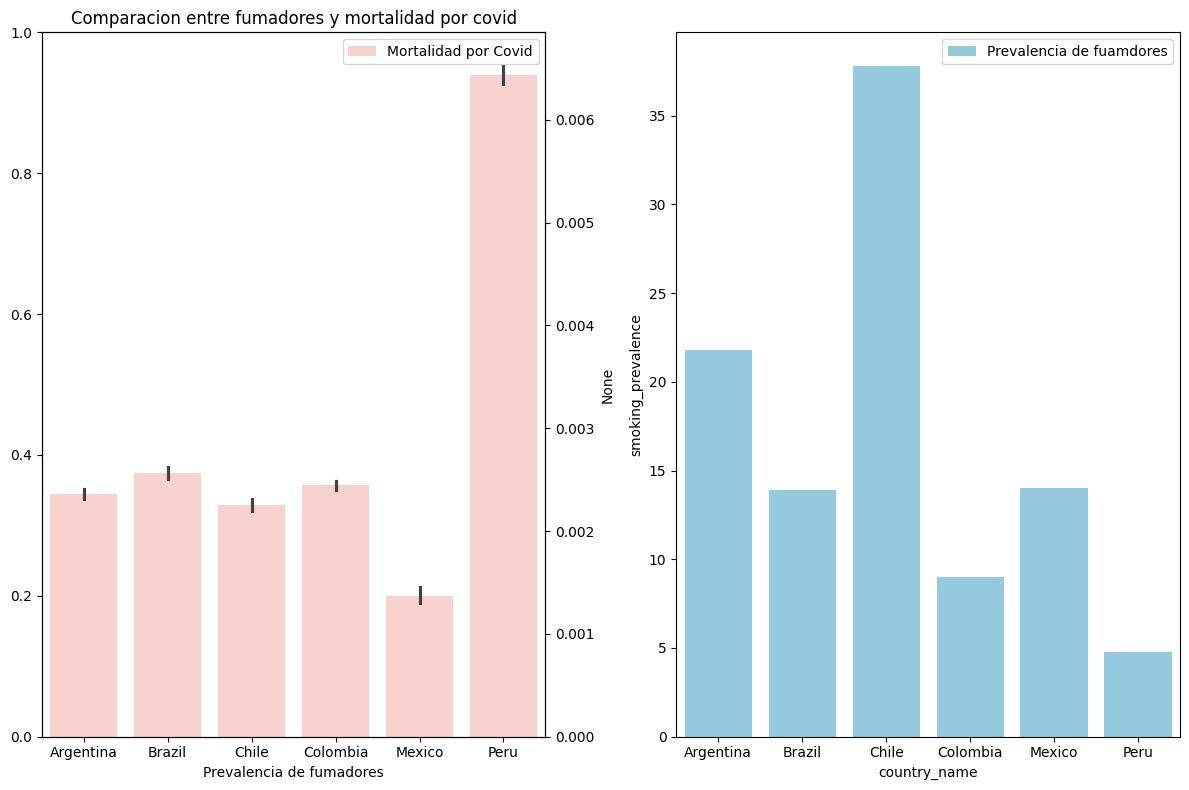

In [34]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=dfNuevo_filtrado, x='country_name', y='smoking_prevalence', color='skyblue', label='Prevalencia de fuamdores')
ax2 = ax.twinx()
sns.barplot(data=dfNuevo_filtrado, x='country_name', y=dfNuevo_filtrado['cumulative_deceased'] / dfNuevo_filtrado['population'],color='salmon', ax=ax2,
            label='Mortalidad por Covid', alpha=0.4)
plt.title('Comparacion entre fumadores y mortalidad por covid')
ax.set_xlabel('Prevalencia de fumadores')
ax2.set_xlabel('Mortalidad por Covid')
plt.tight_layout()
plt.show()

# Avance 3

Genera gráficas acordes a tu análisis. Las mismas pueden ser:
* Evolución de Casos Activos vs. Recuperados
* Tasa de Crecimiento (%)
* Relación entre la Cobertura de Vacunación y la Reducción de Casos
* ('País') Progreso de la vacunación por país
* Nuevos casos y temperatura promedio
* Impacto de la Urbanización en la Propagación del Covid-19
* Evolución Semanal de Casos Nuevos
* Evolución Anual de Casos Nuevos
* Distribución de la Población por Edad en Países
* Comparación de Estrategias de Vacunación en América Latina
* Evolución del Número de Muertes Diarias.
* Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
* Variación Mensual de Casos y Muertes
* Análisis Temporal de la Mortalidad/
* Comparación de la Situación Actual (Contexto de los datos)

### Evolucion de casos activos vs recuperados.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19820\3374866074.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfNuevo_filtrado.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='g', label='Casos confirmados')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19820\3374866074.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfNuevo_filtrado.resample('M').mean(numeric_only=True)['vaccination_percentage'].plot(ax=ax2, color='b', label='Porcentaje de vacunación')


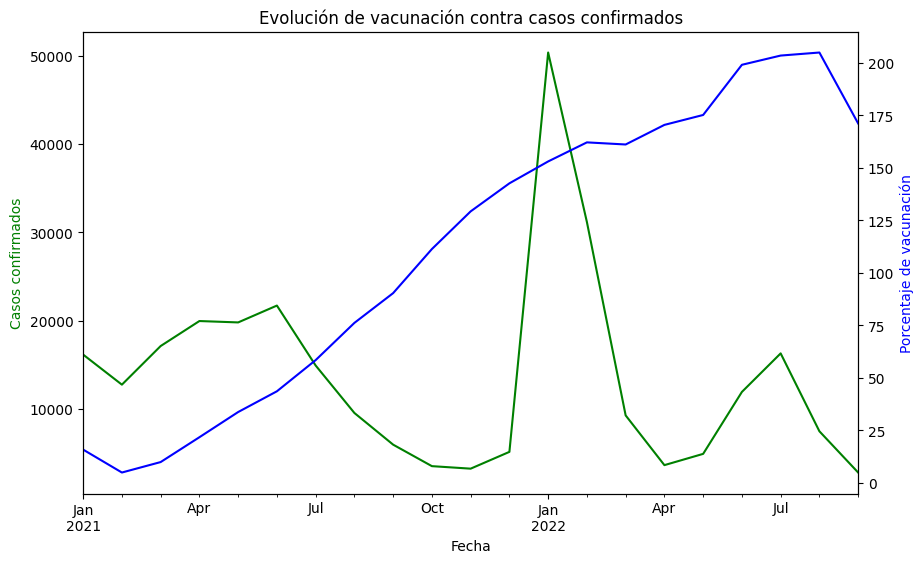

In [35]:
# Evolucion de vacunacion contra casos confirmados

plt.figure(figsize=(10, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Porcentaje de vacunacion
dfNuevo_filtrado['vaccination_percentage'] = dfNuevo_filtrado['cumulative_vaccine_doses_administered'] / dfNuevo_filtrado['population'] * 100
dfNuevo_filtrado.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='g', label='Casos confirmados')
dfNuevo_filtrado.resample('M').mean(numeric_only=True)['vaccination_percentage'].plot(ax=ax2, color='b', label='Porcentaje de vacunación')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos confirmados', color='g')
ax2.set_ylabel('Porcentaje de vacunación', color='b')
plt.title('Evolución de vacunación contra casos confirmados')   

plt.show()

En este gráfico observamos el crecimiento estable de las dosis de vacunación en relación con los aumentos de casos durante los periodos analizados. Los grandes picos de casos se produjeron durante el verano de 2022, seguidos de un descenso gracias al incremento en la cantidad de dosis administradas.

### Tasa de crecimiento(%)

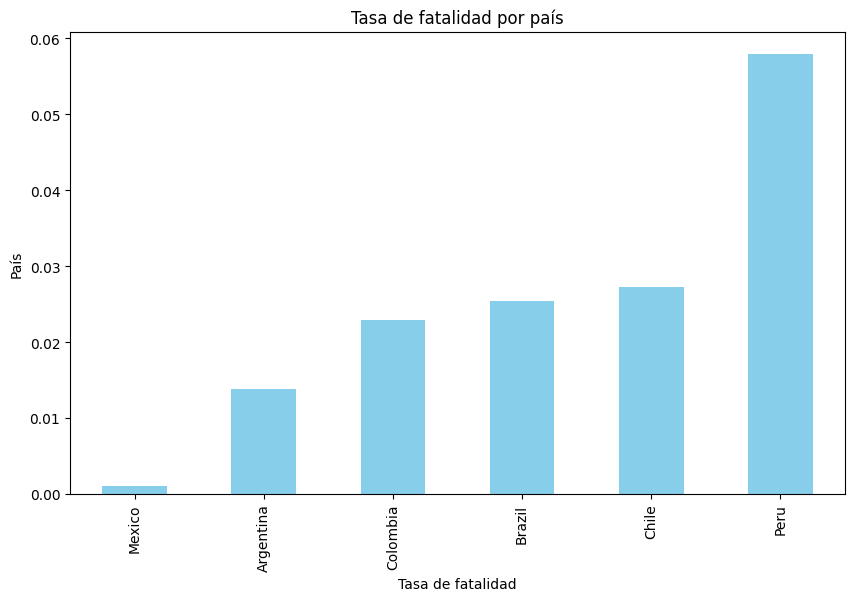

In [36]:
# Tasa de fatalidad
dfNuevo_filtrado['fatality_rate'] = dfNuevo_filtrado['cumulative_deceased'] / dfNuevo_filtrado['cumulative_confirmed'] 
fatality_rate = dfNuevo_filtrado.groupby('country_name')['fatality_rate'].last().sort_values()

plt.figure(figsize=(10, 6))
fatality_rate.plot(kind='bar', color='skyblue')
plt.xlabel('Tasa de fatalidad')
plt.ylabel('País')
plt.title('Tasa de fatalidad por país')
plt.show()


En esta tabla observamos que Perú es el país más afectado en cuanto a la tasa de mortalidad por COVID-19, donde el impacto ha sido significativo. La alta tasa de mortalidad puede estar relacionada con la densidad poblacional promedio del país. Al tener una población relativamente baja, la proporción de muertes es mayor en relación con el total de la población.

### Progreso de la vacunación por país

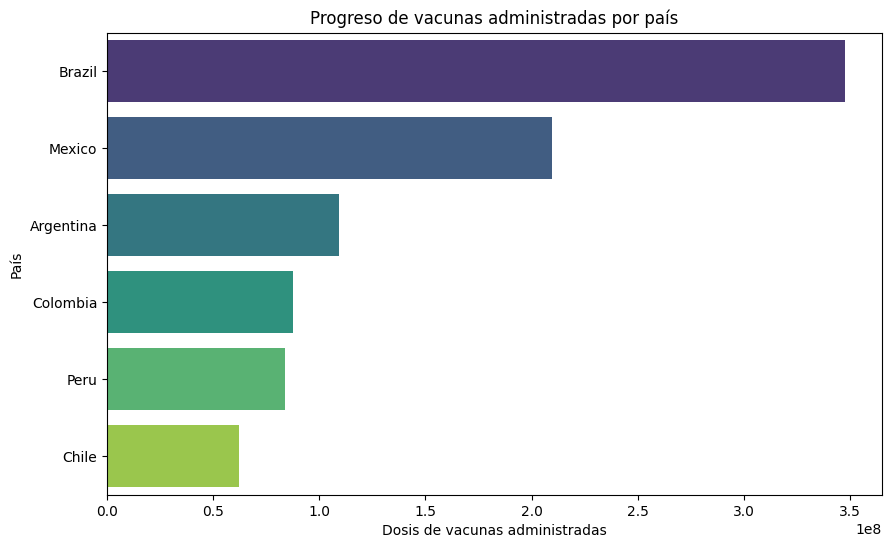

In [37]:
data_vacunacion = dfNuevo_filtrado.groupby(['country_name'])['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=data_vacunacion.values, y=data_vacunacion.index, hue = data_vacunacion.index , palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de vacunas administradas por país')
plt.show()

### Nuevos casos y temperatura promedio

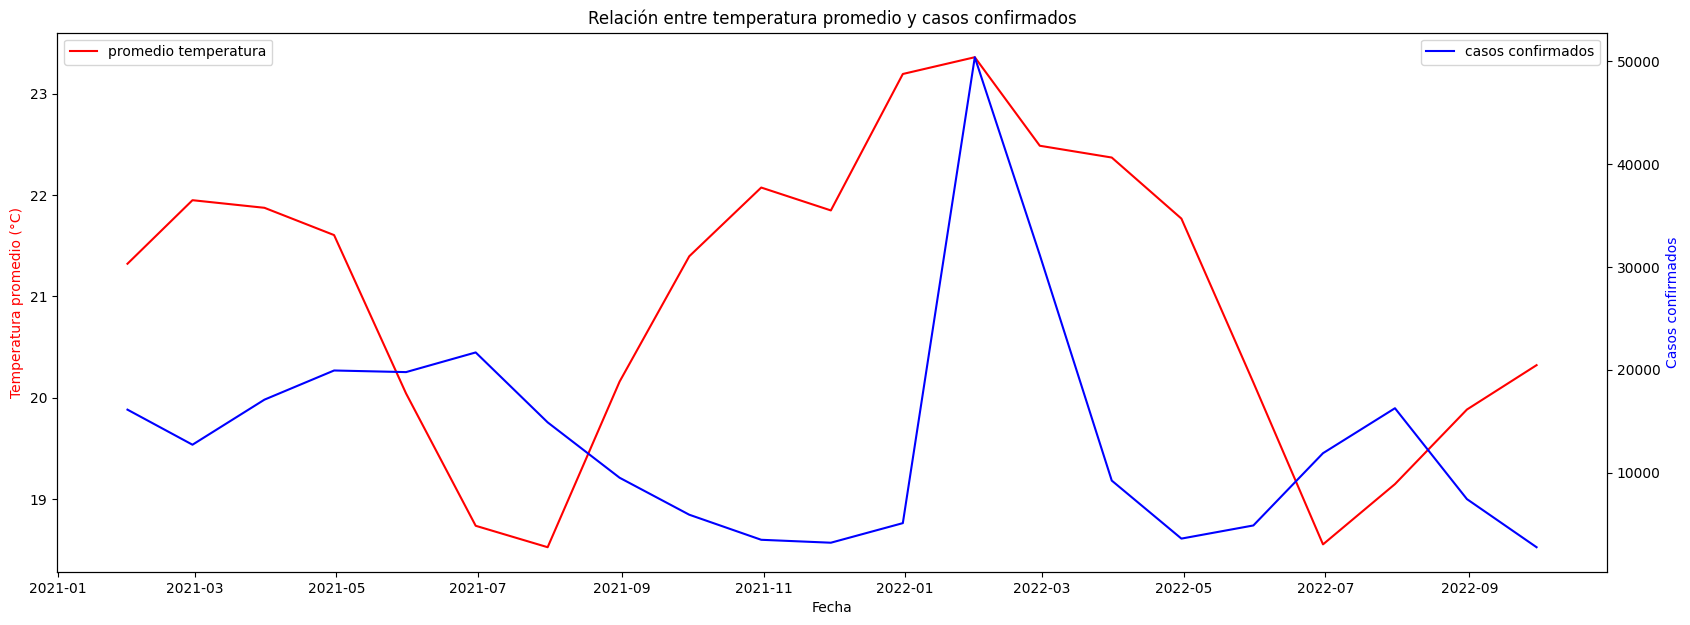

In [38]:
plt.figure(figsize=(20, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()   
ax2.plot(dfNuevo_filtrado.resample('ME').mean(numeric_only=True).index, dfNuevo_filtrado.resample('ME').mean(numeric_only=True)['new_confirmed'], color="blue", label='casos confirmados')
ax1.plot(dfNuevo_filtrado.resample('ME').mean(numeric_only=True).index, dfNuevo_filtrado.resample('ME').mean(numeric_only=True)['average_temperature_celsius'],color='red', label='promedio temperatura')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Temperatura promedio (°C)', color='red')
ax2.set_ylabel('Casos confirmados', color='blue')
plt.title('Relación entre temperatura promedio y casos confirmados')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

En este grafico se puede observar una relacion entre el aumento de casos y el aumento de temperatura promedio, ya que en su punto mas alto el aumento de casos, esto puede ser debido a verios factores ya que la actividad que se produce durante estas fechas, recordemos que en latinoamerica estas fechas donde se ven mayores cantidad de casos coinciden epocas de verano, por ende epocas de vacaciones, luego de las celebraciones(navidad y año nuevo) entonces luego de estos festejos se ve un aumento, tambien la condicional del clima y el comportamiento humano, la necesidad de querer salir y sociabilizar crece y esto implica agrupacion de personas y aumenta la propagacion de casos.

### Impacto de la Urbanización en la Propagación del Covid-19

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19820\3782370328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_percentaje'], y=urban_cases.index, palette='viridis')


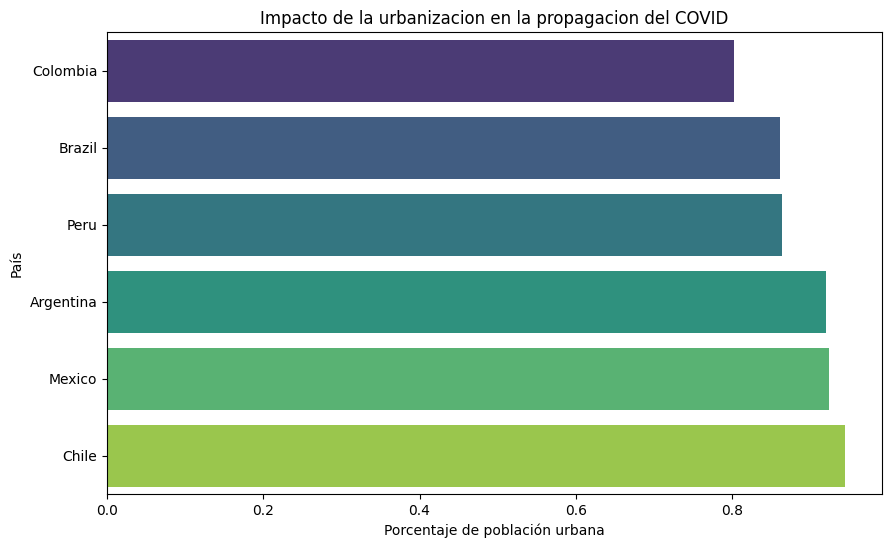

In [39]:
dfNuevo_filtrado['urban_population_percentaje'] = dfNuevo_filtrado['population_urban'] / dfNuevo_filtrado['population']
urban_cases = dfNuevo_filtrado.groupby('country_name').last().sort_values(by='urban_population_percentaje')

plt.figure(figsize=(10, 6))
sns.barplot(x=urban_cases['urban_population_percentaje'], y=urban_cases.index, palette='viridis')
plt.xlabel('Porcentaje de población urbana')
plt.ylabel('País')
plt.title('Impacto de la urbanizacion en la propagacion del COVID')
plt.show()

El pais con mayor propagacion urbana del virus, fue chile, aunque es el pais con menor superficie y uno de los que posee menor poblacion, puede deberse a este caso, ya que su densidad poblacional de este pais, puede suceder que chile fue el pais donde mayor propagacion del virus hubo.

### Evolución Semanal de Casos Nuevos y Evolución Mensual de Casos Nuevos

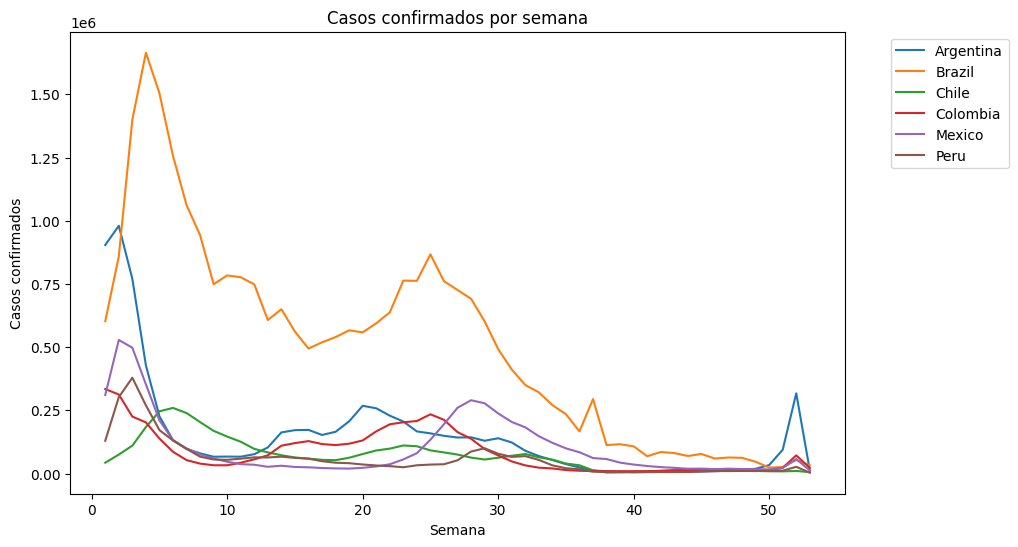

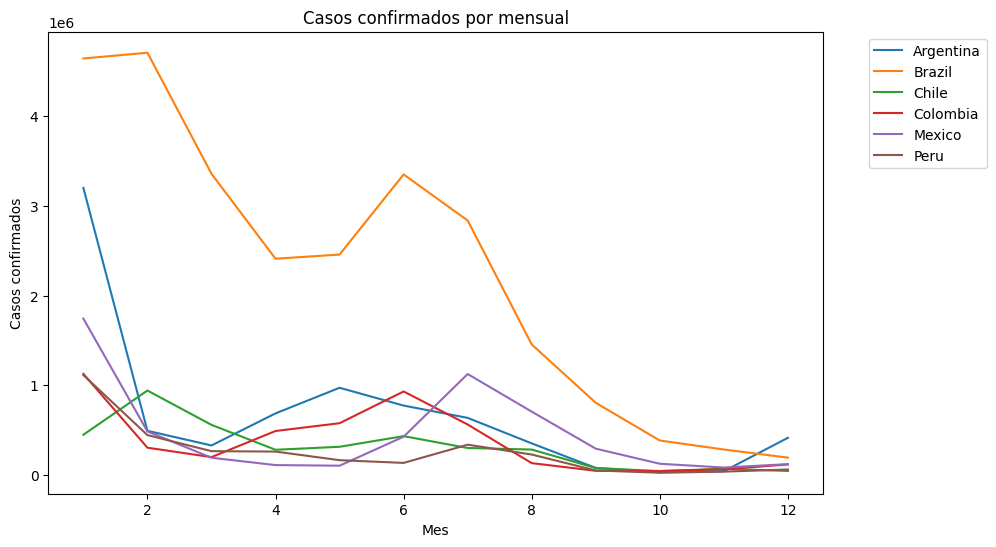

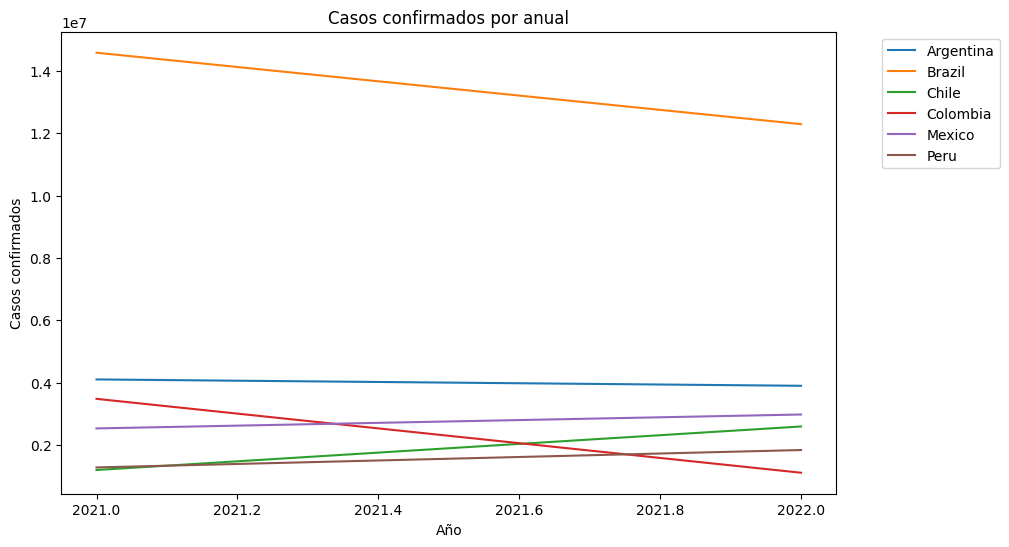

In [40]:
dfNuevo_filtrado['year'] = dfNuevo_filtrado.index.isocalendar().year
dfNuevo_filtrado['week'] = dfNuevo_filtrado.index.isocalendar().week

# Week
weekly_cases = dfNuevo_filtrado.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(10, 6))
for i in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == i]
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=i)

plt.xlabel('Semana')
plt.ylabel('Casos confirmados')
plt.title('Casos confirmados por semana')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Month
dfNuevo_filtrado['month'] = dfNuevo_filtrado.index.month
monthly_cases = dfNuevo_filtrado.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(10, 6))
for i in monthly_cases['country_name'].unique():
    country_monthly_cases = monthly_cases[monthly_cases['country_name'] == i]
    plt.plot(country_monthly_cases['month'], country_monthly_cases['new_confirmed'], label=i)

plt.xlabel('Mes')
plt.ylabel('Casos confirmados')
plt.title('Casos confirmados por mensual')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Year
dfNuevo_filtrado['year'] = dfNuevo_filtrado.index.year
year_cases = dfNuevo_filtrado.groupby(['country_name', 'year'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(10, 6))
for i in year_cases['country_name'].unique():
    country_year_cases = year_cases[year_cases['country_name'] == i]
    plt.plot(country_year_cases['year'], country_year_cases['new_confirmed'], label=i)

plt.xlabel('Año')
plt.ylabel('Casos confirmados')
plt.title('Casos confirmados por anual')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Distribución de la Población por Edad en Países

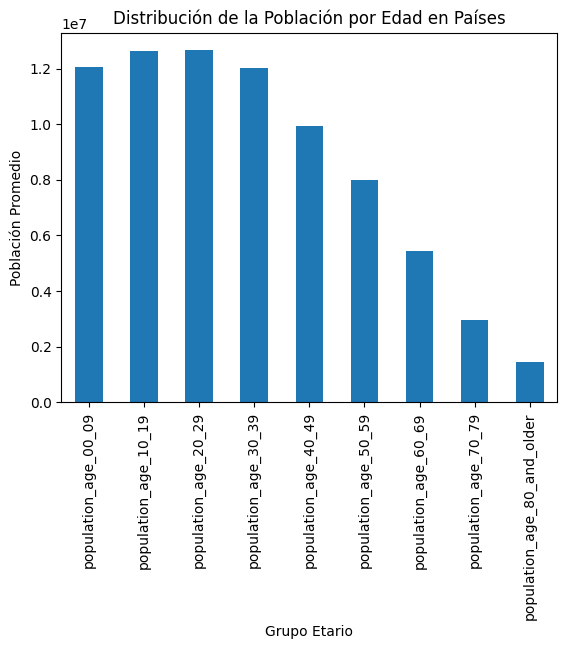

In [41]:
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 
            'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 
            'population_age_80_and_older']

dfNuevo_filtrado[age_columns].mean().plot(kind='bar')
plt.title('Distribución de la Población por Edad en Países')
plt.xlabel('Grupo Etario')
plt.ylabel('Población Promedio')
plt.show()

### Comparación de Estrategias de Vacunación en América Latina


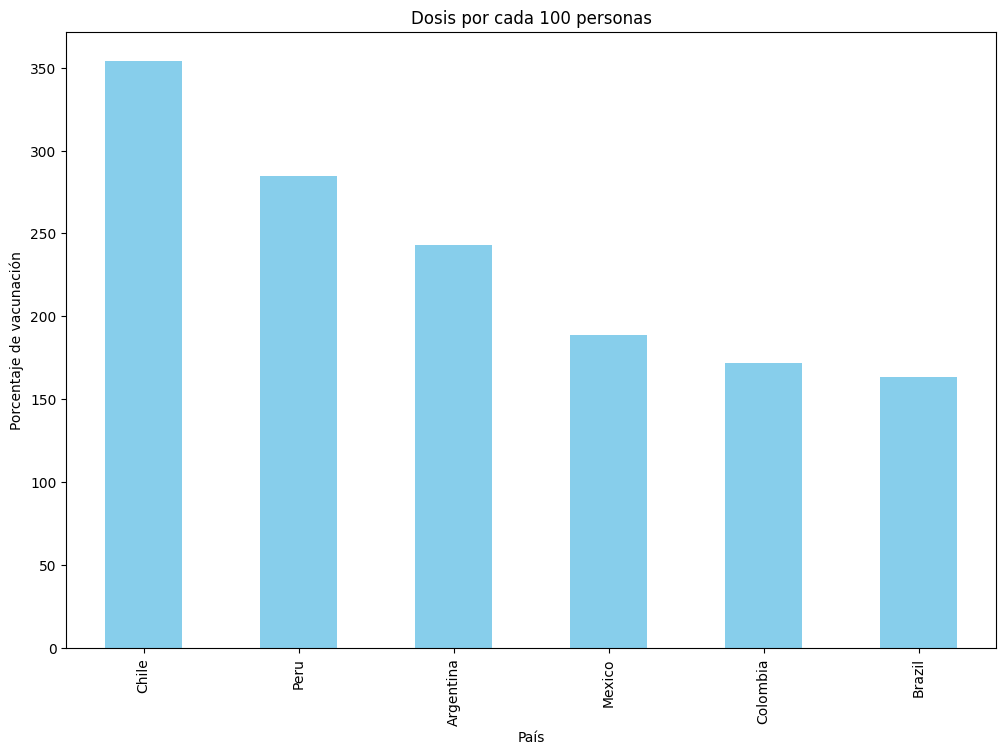

In [42]:
vaccination_strategy = dfNuevo_filtrado.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / dfNuevo_filtrado.groupby('country_name')['population'].max() * 100
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.xlabel('País')
plt.ylabel('Porcentaje de vacunación')
plt.title('Dosis por cada 100 personas')
plt.show()


Por cada 100 personas se administraban 3,5 dosis.
Tener en cuenta que por cada personas se administraban 3 o 2 dosis por personas.

### Distribucion de mortalidad por grupo etario por pais

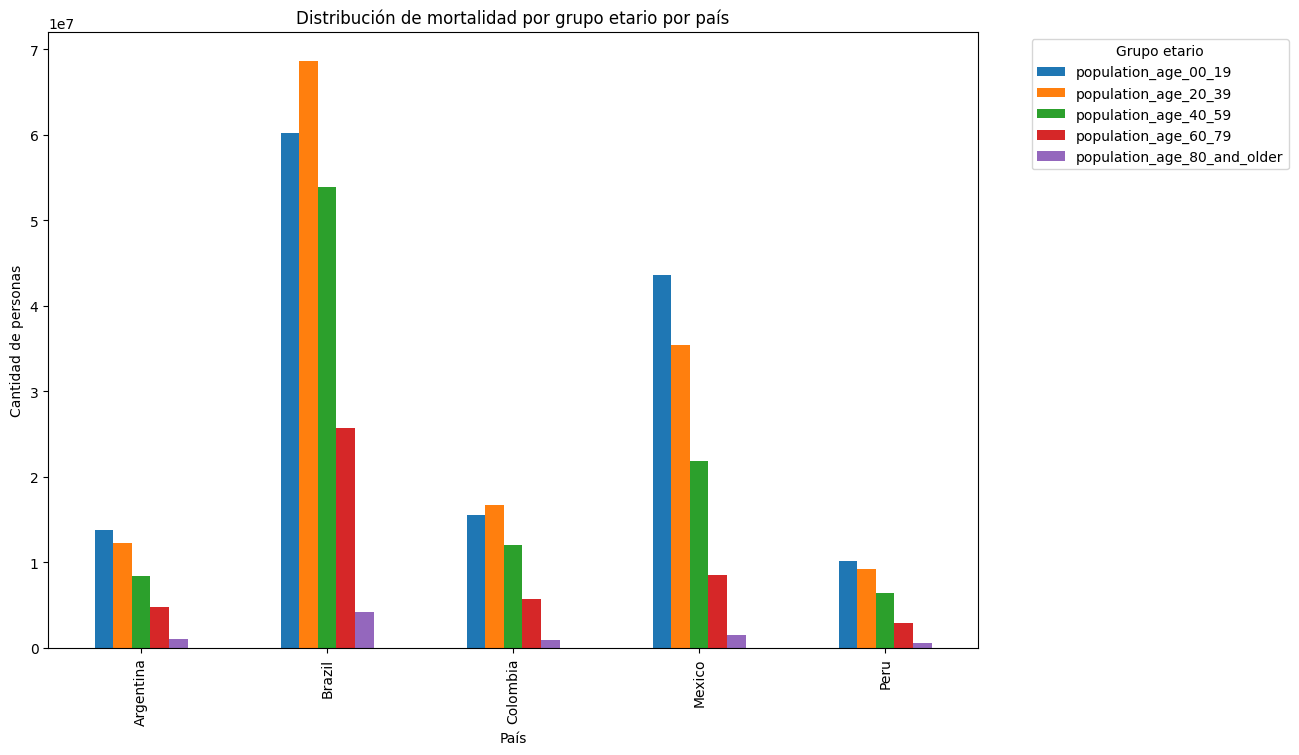

In [43]:
#Distribucion de mortalidad por grupo etario por pais
high_mortality = dfNuevo_filtrado.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_19', 'population_age_20_39', 'population_age_40_59', 'population_age_60_79', 'population_age_80_and_older']
age_distribution = dfNuevo_filtrado[dfNuevo_filtrado['country_name'].isin(high_mortality)].groupby('country_name')[age_groups].mean()

age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('País')
plt.ylabel('Cantidad de personas')
plt.title('Distribución de mortalidad por grupo etario por país')
plt.legend(title='Grupo etario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Por rango etario observamos la distribucion de 5 paises ya que Chile en este caso es el pais con menor cantidad de muertes es Chile y no apareceria dentro de esta tabla por la baja tasa de mortalidad que tuvo

### Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad


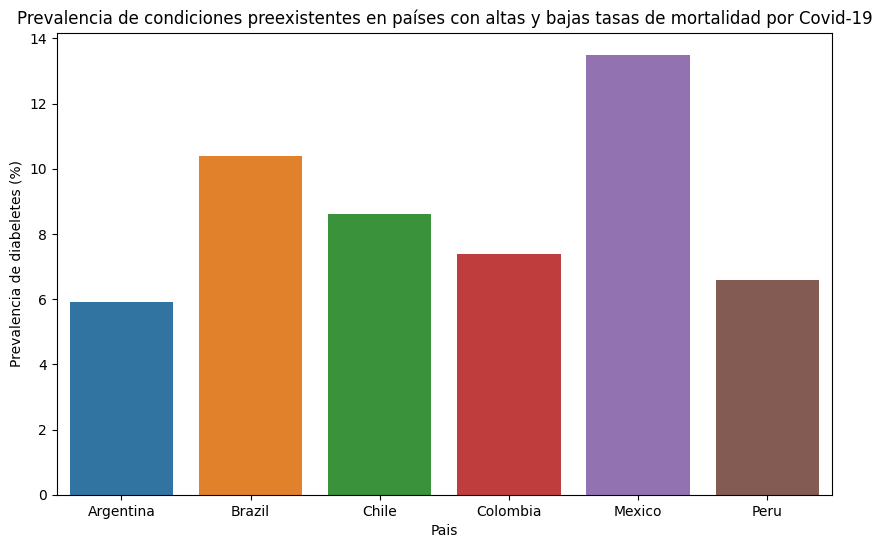

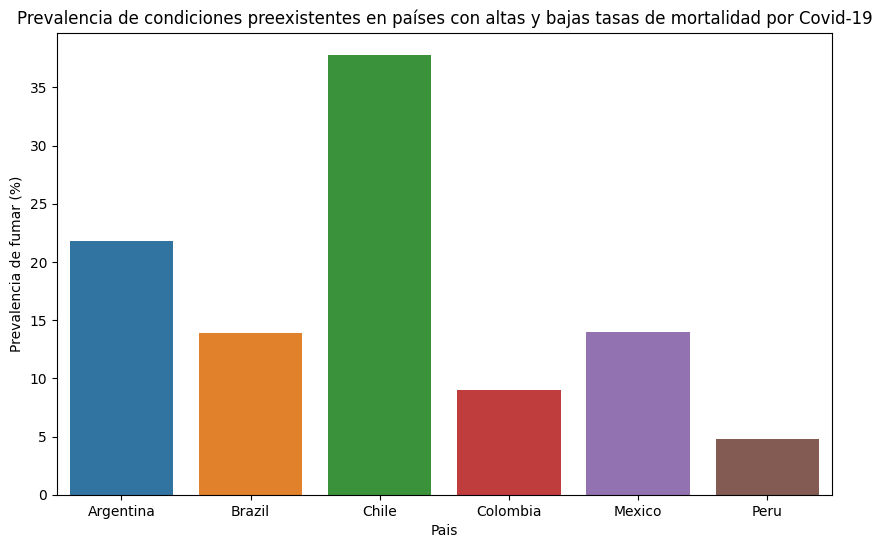

In [44]:
# Prevalencia de diabetes 

top_countries = dfNuevo_filtrado.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries = dfNuevo_filtrado.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
conditions_data = dfNuevo_filtrado[dfNuevo_filtrado['country_name'].isin(top_countries.union(bottom_countries))]


plt.figure(figsize=(10, 6))
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de diabeletes (%)')
plt.title('Prevalencia de condiciones preexistentes en países con altas y bajas tasas de mortalidad por Covid-19')
plt.show()

#Prevalencia de Smoking 
plt.figure(figsize=(10, 6))
sns.barplot(data=dfNuevo_filtrado, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de fumar (%)')
plt.title('Prevalencia de condiciones preexistentes en países con altas y bajas tasas de mortalidad por Covid-19')
plt.show()


En cuanto a porcentajes de prevalencias de diabetes observamos que Mexico y Brasil son los paises que poseen una mayor tasa de la prevalencia de diabetes en comparaion con el resto, siendo los paises con mayor porcentaje de esta enfermedad, lo que afecta tambien, ya que es un gran factor que puede afectar o agravar los sintomas de esta enfermedad.
En cuanto a la prevalencia de los fumadores el porcentaje muestra que Chile es el paise con mayor porcentaje siendo esto un factor clave con respecto a la cantidad de afectados.



### Evolucion de Mortalidad por Covid-19

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19820\295526573.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dfNuevo_filtrado, x=dfNuevo_filtrado.index, y='fatality_rate', estimator='mean', ci=None)


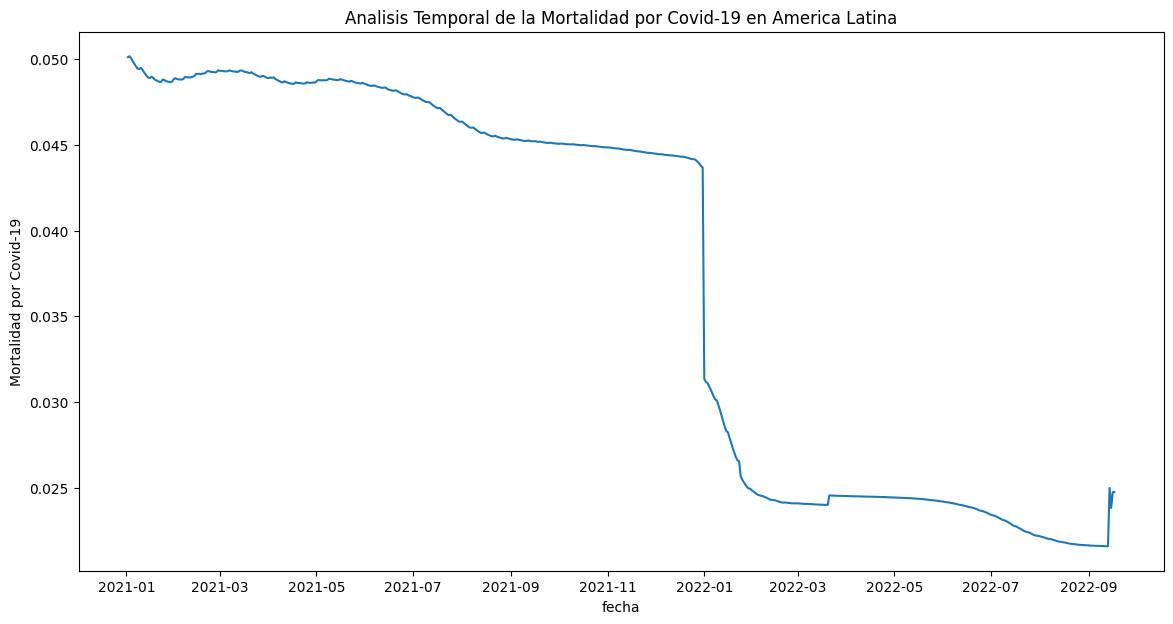

In [45]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=dfNuevo_filtrado, x=dfNuevo_filtrado.index, y='fatality_rate', estimator='mean', ci=None)
plt.title('Analisis Temporal de la Mortalidad por Covid-19 en America Latina')
plt.xlabel('fecha')
plt.ylabel('Mortalidad por Covid-19')
plt.show()

### Evolución de Casos activos vs recuperados en América Latina

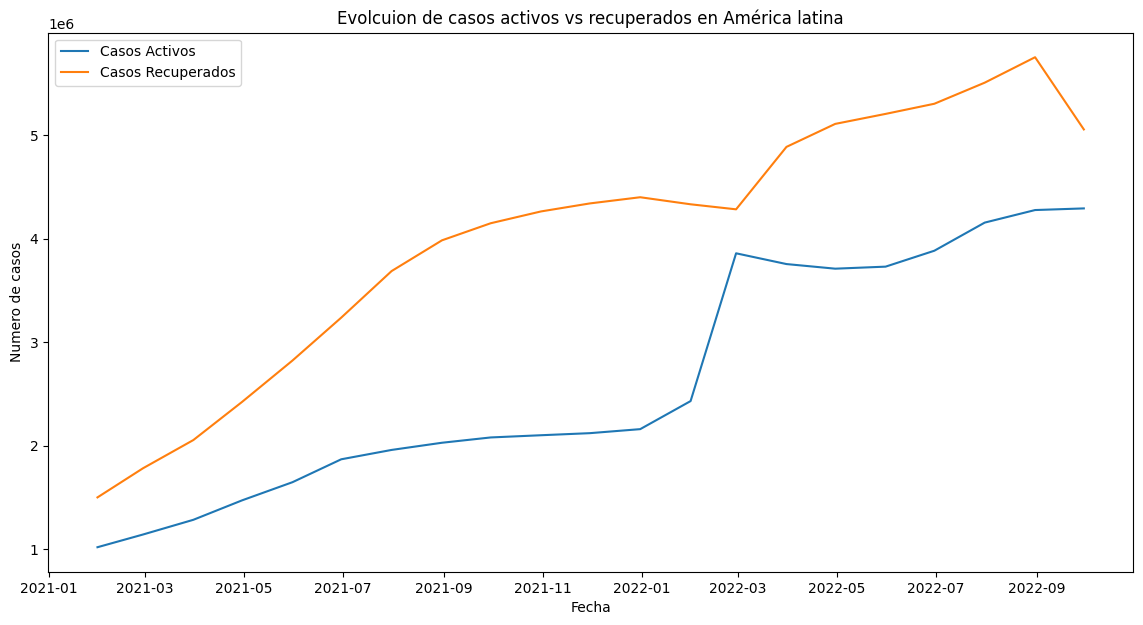

In [46]:
dfNuevo_filtrado['active_cases'] = dfNuevo_filtrado['cumulative_confirmed'] - dfNuevo_filtrado['cumulative_deceased'] - dfNuevo_filtrado['cumulative_recovered']

plt.figure(figsize=(14, 7))
sns.lineplot(data=dfNuevo_filtrado.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=dfNuevo_filtrado.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Numero de casos')
plt.title('Evolcuion de casos activos vs recuperados en América latina')
plt.legend()
plt.show()

En este gráfico, observamos que la cantidad de recuperados es mayor que la de casos activos y cómo su evolución ha sido progresiva en este periodo. Se muestra un alto pico de casos durante el verano de 2022, cuando coinciden la mayor cantidad de casos con la menor cantidad de recuperados. Se puede observar cómo esta variable ha afectado ambas columnas.

### Comparación de la Situación Actual.

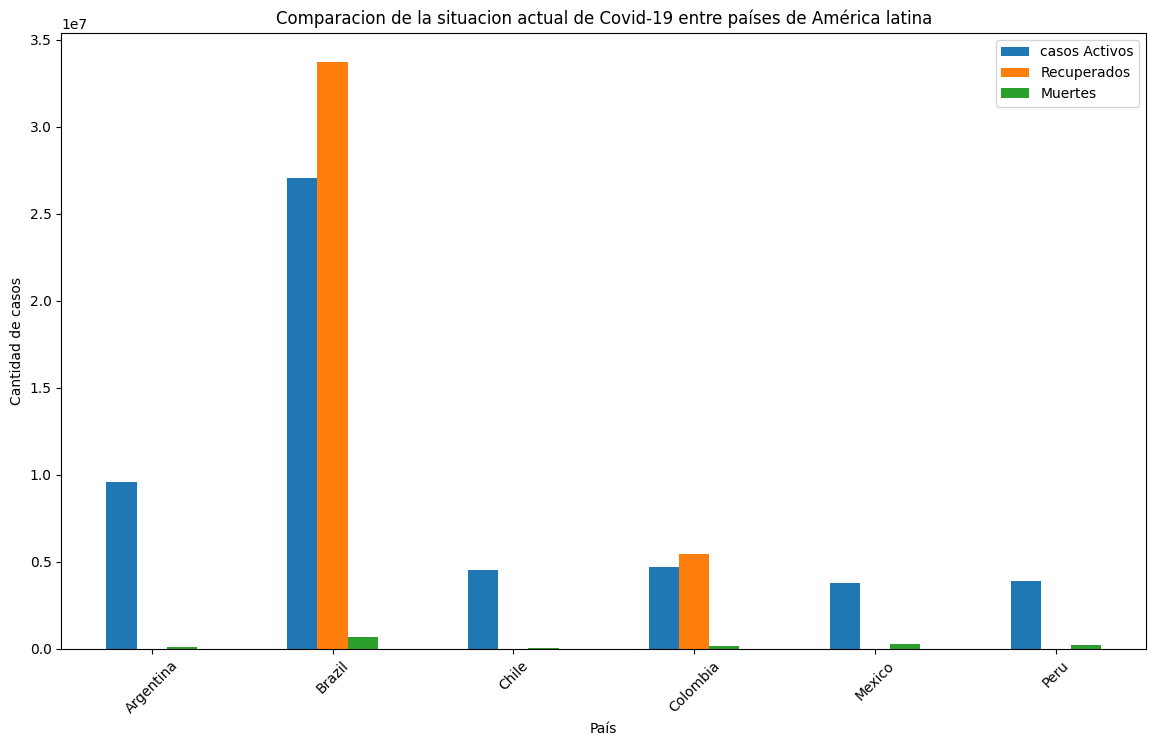

In [47]:
# No se tienen dato pero hay datos de recuperados y muertes en algunos paises

current_situation = dfNuevo_filtrado.groupby('country_name').max()[['active_cases','cumulative_recovered', 'cumulative_deceased']]
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparacion de la situacion actual de Covid-19 entre países de América latina')
plt.xlabel('País')
plt.ylabel('Cantidad de casos')
plt.legend(['casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

En esta columna observamos la situación actual. Aunque tenemos pocos datos sobre algunos países, vemos que la cantidad de casos activos todavía prevalece en todos ellos, mientras que la cantidad de recuperados es muy baja debido a la falta de datos, al igual que la baja cantidad de muertes reportadas. Brasil se destaca con los mayores números en esta estadística, lo que coincide con análisis anteriores, reflejando esos números debido a su población, densidad y extensión geográfica.

### Extra Credit

In [48]:
import folium 
from folium.plugins import HeatMap

# seleccioanmos las columnas que vamos a utilizar 
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = dfNuevo_filtrado[columns]

# creamos el mapa
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

#creamos un mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map [['latitude','longitude','cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

#creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map [['latitude','longitude','cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

#creamos un mapa de calor para las vacunas administradas
heat_map_vaccine_doses_administered = HeatMap(data=data_map [['latitude','longitude','cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine_doses_administered)

#creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map [['latitude','longitude','cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map

Utilizamos Geopandas

### Guardamos el archivo Csv.

In [49]:
dfNuevo_filtrado.to_csv('DatosFinalesFiltrados_Graficados.csv', index=True)